# NBA data

# Exploratory Data analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
path = './nba_logreg.csv'
df = pd.read_csv(path)
data = df.copy()

In [5]:
data.duplicated().sum()

12

In [6]:
data.drop_duplicates(inplace=True, ignore_index=True)

In [7]:
data.drop(columns=["Name"], inplace=True)

In [8]:
data["TARGET_5Yrs"].value_counts(normalize=True)

TARGET_5Yrs
1.0    0.620482
0.0    0.379518
Name: proportion, dtype: float64

In [9]:
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [10]:
data.shape

(1328, 20)

In [11]:
data.dtypes

GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs    float64
dtype: object

In [12]:
data.isna().sum()

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            10
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [13]:
data[data["3P%"].isna()]

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
334,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
335,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
353,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
379,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
390,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
499,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
501,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
502,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
513,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0
551,56,18.9,4.7,2.1,4.6,45.0,0.0,0.0,NaN,0.5,0.7,67.5,1.1,3.8,4.9,0.7,0.6,0.8,1.1,1.0


In [14]:
data.dropna()["TARGET_5Yrs"].value_counts(normalize=True)

TARGET_5Yrs
1.0    0.621396
0.0    0.378604
Name: proportion, dtype: float64

In [15]:
feature_columns = data.columns[:-1]

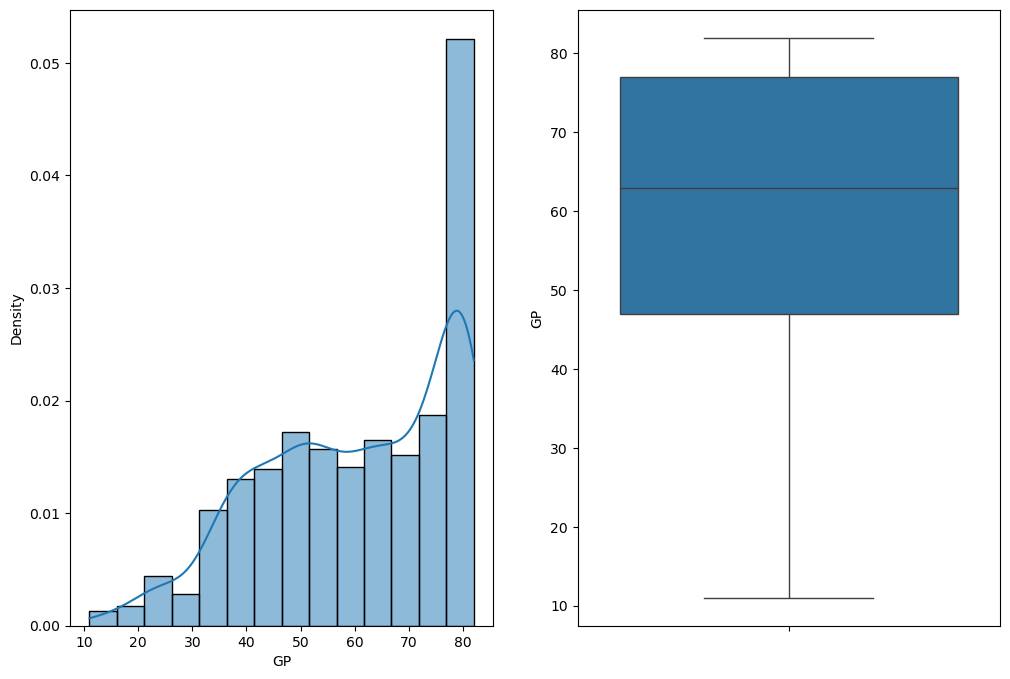

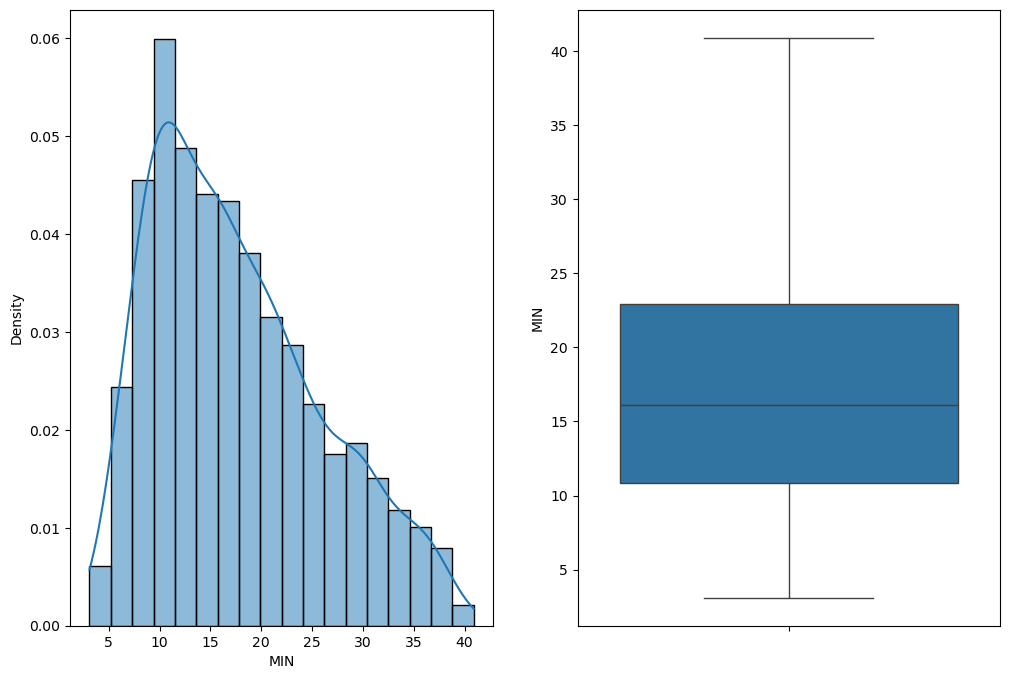

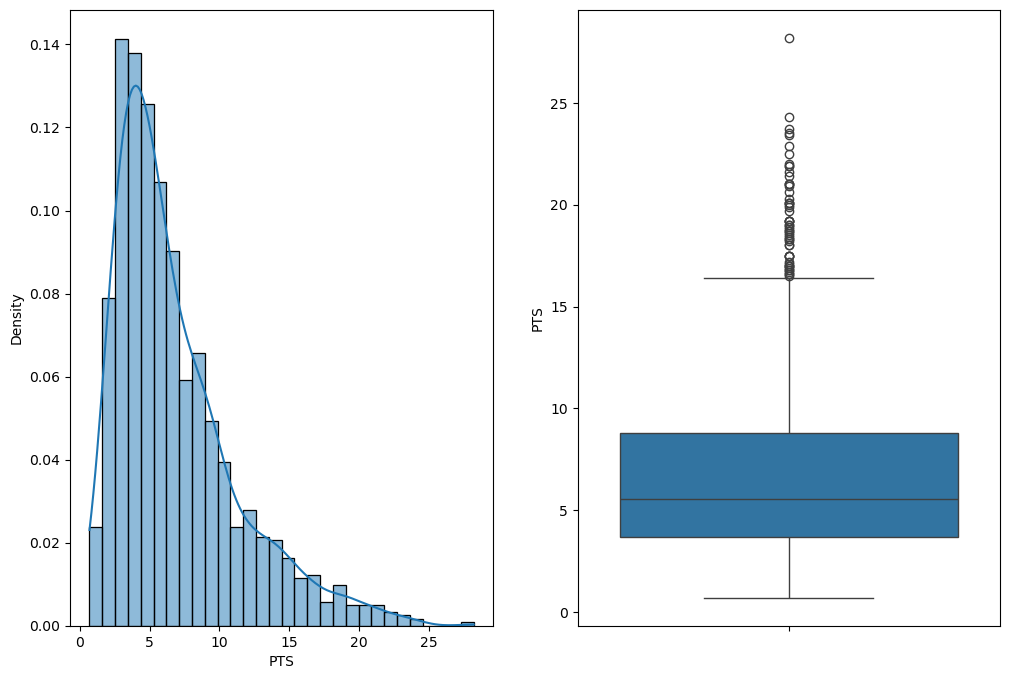

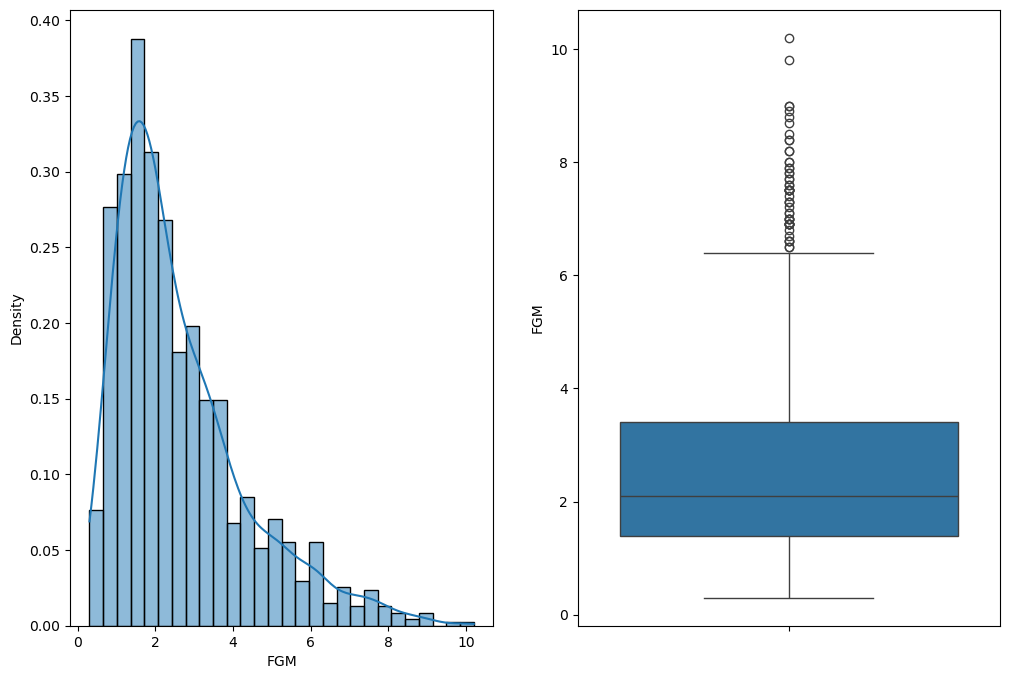

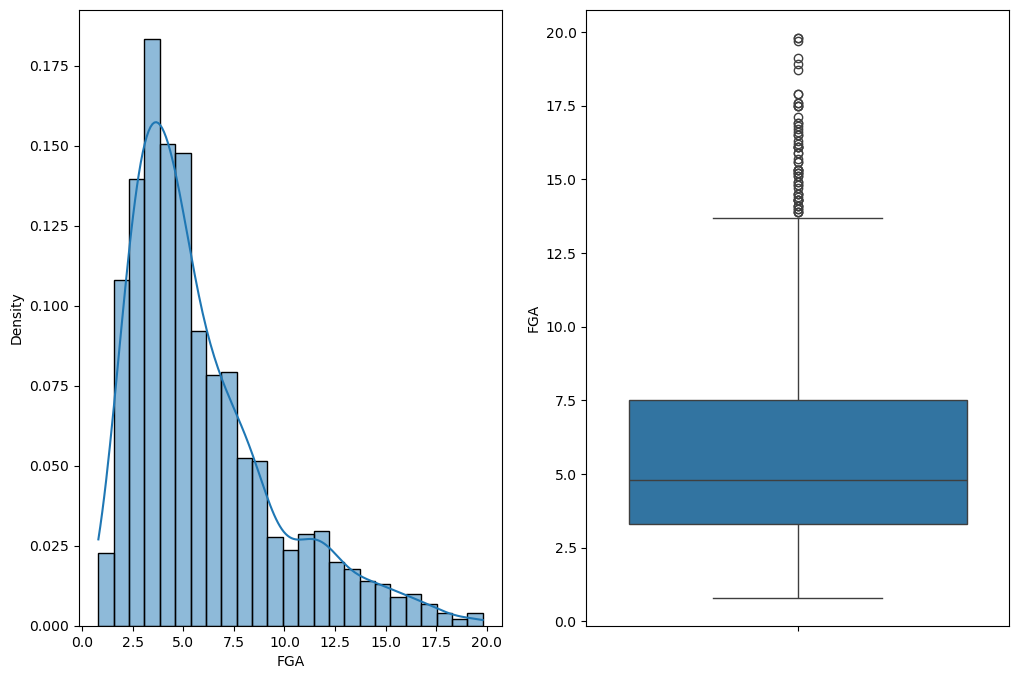

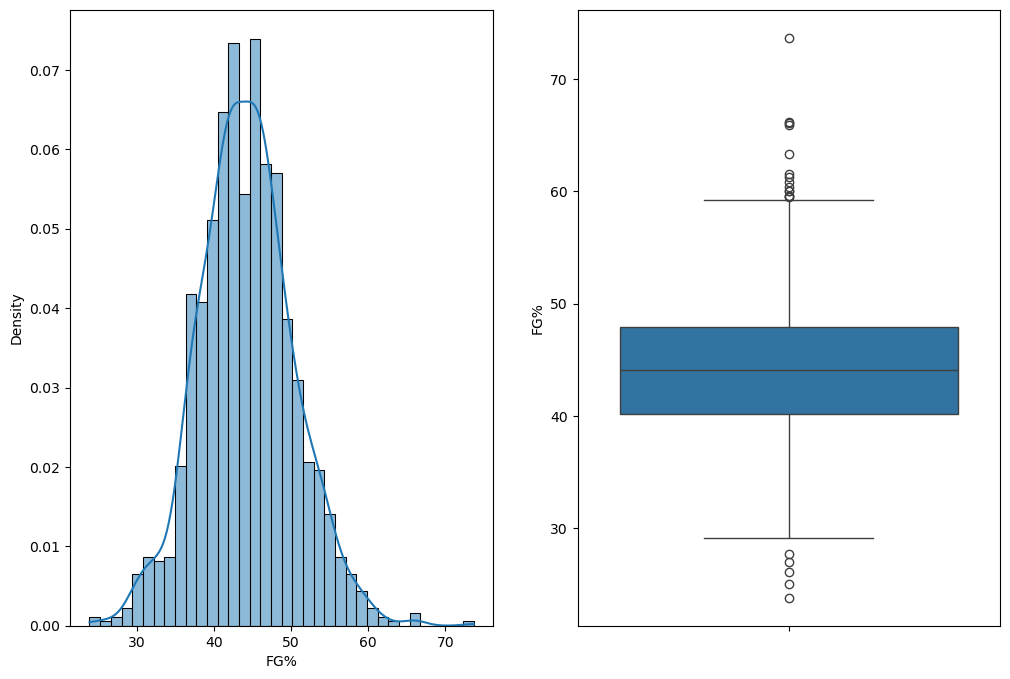

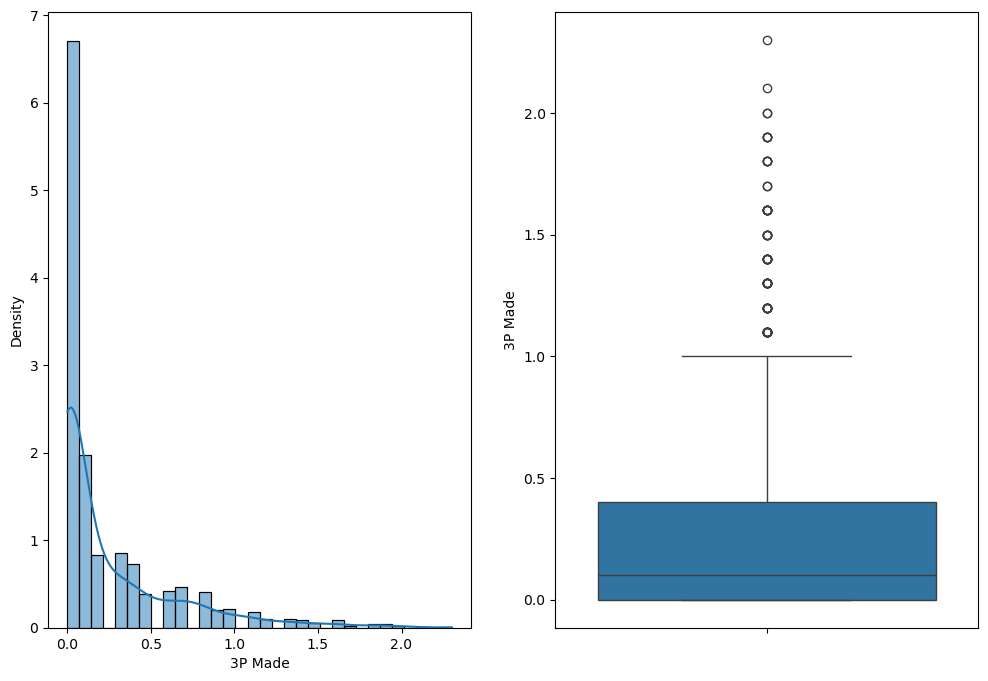

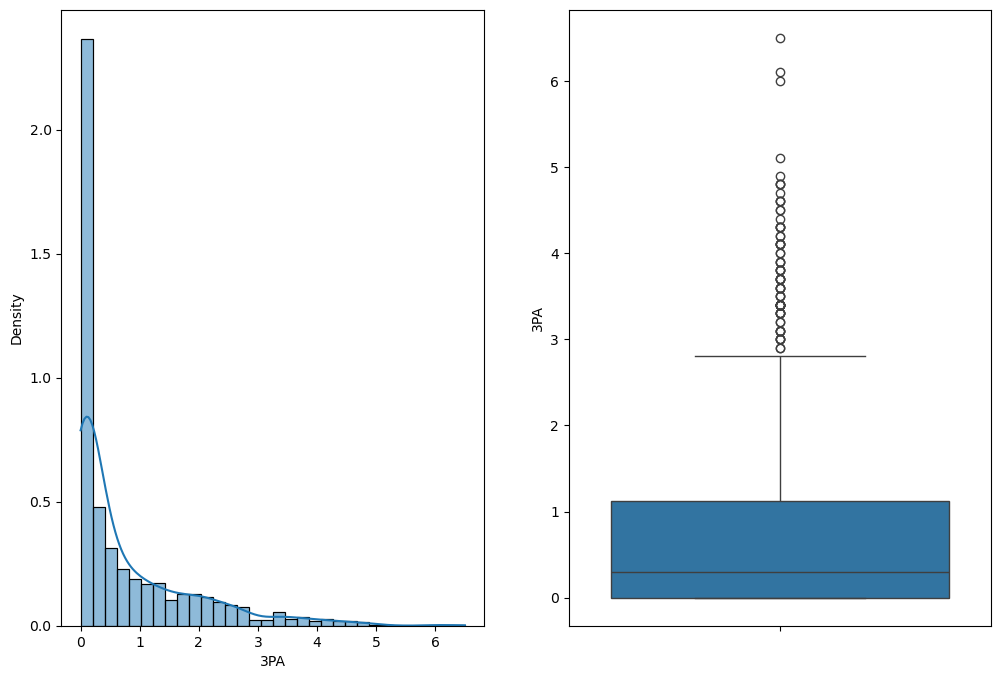

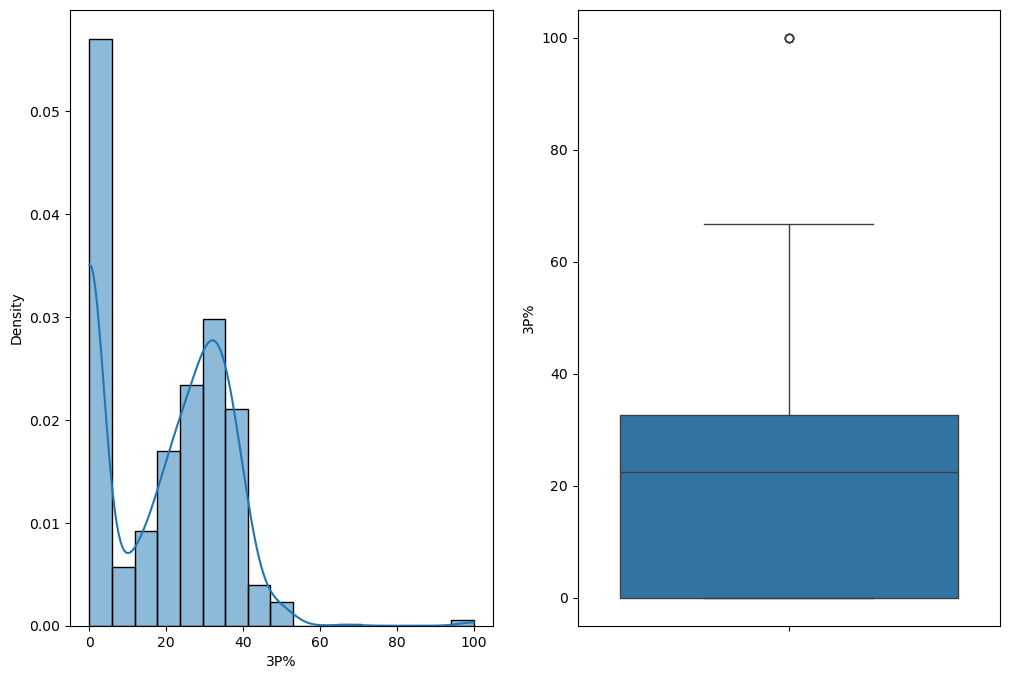

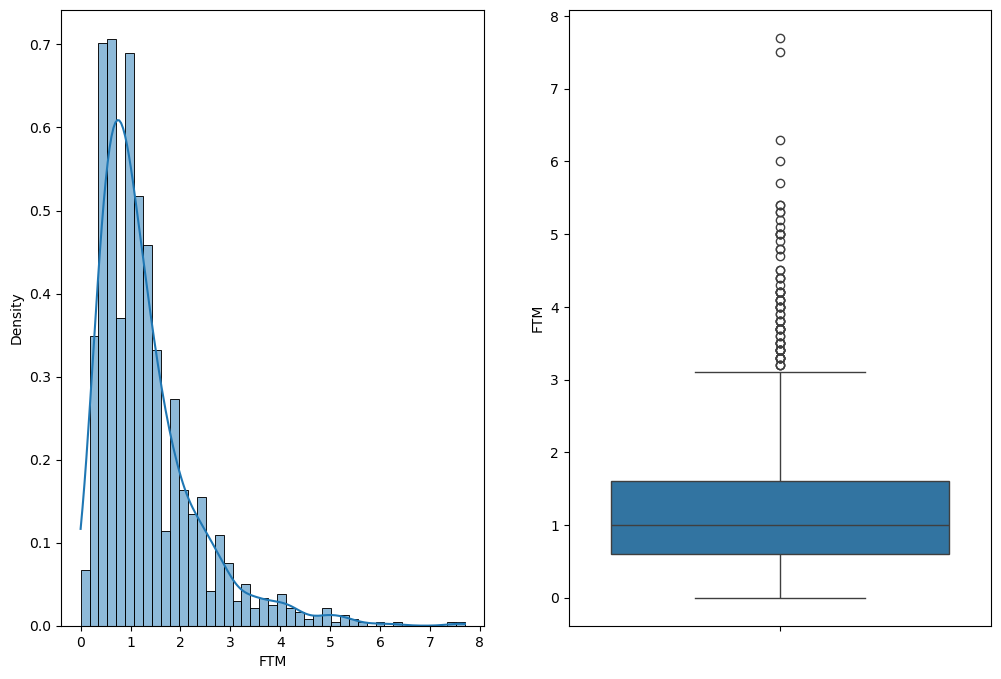

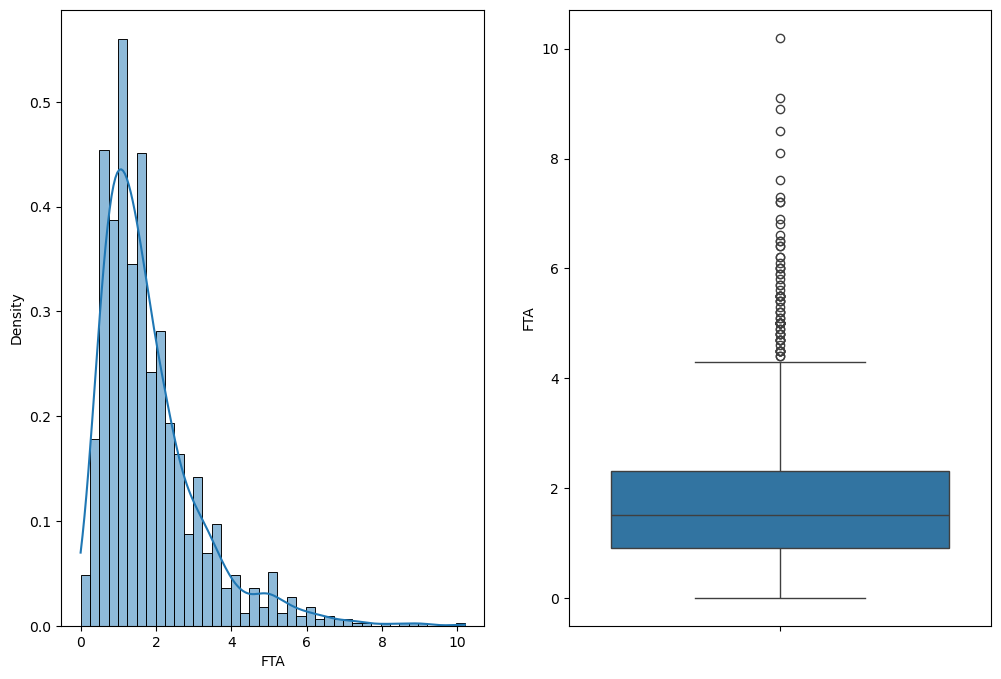

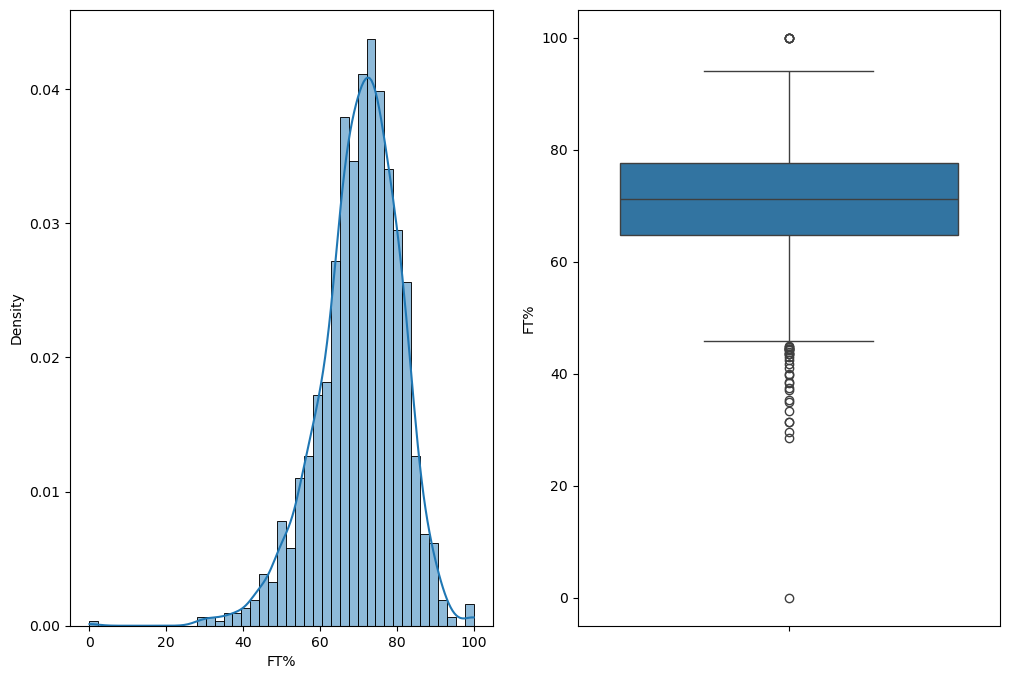

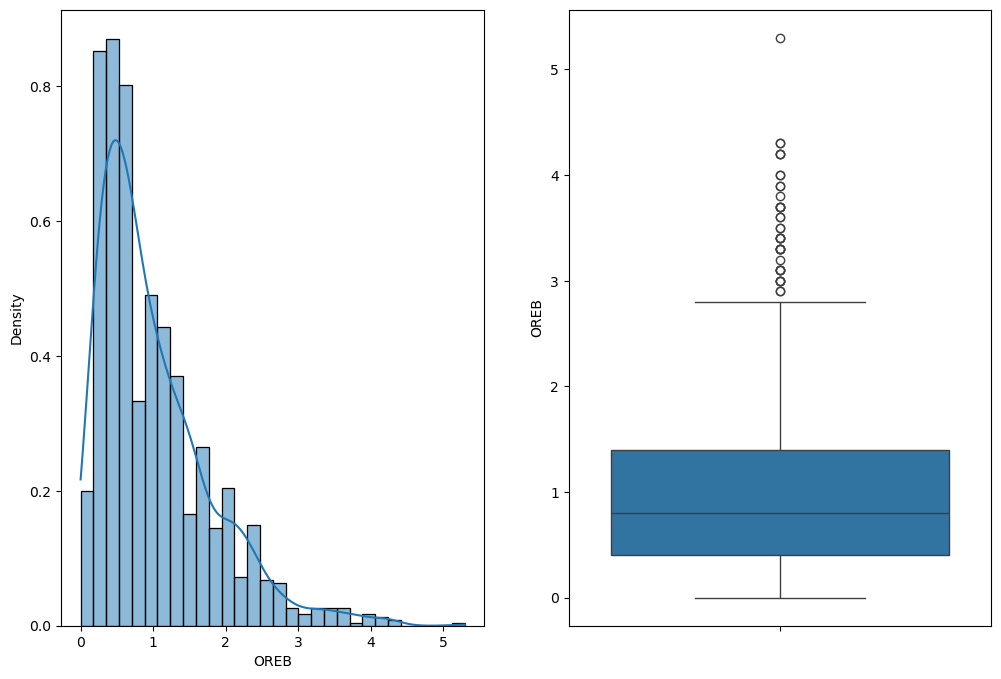

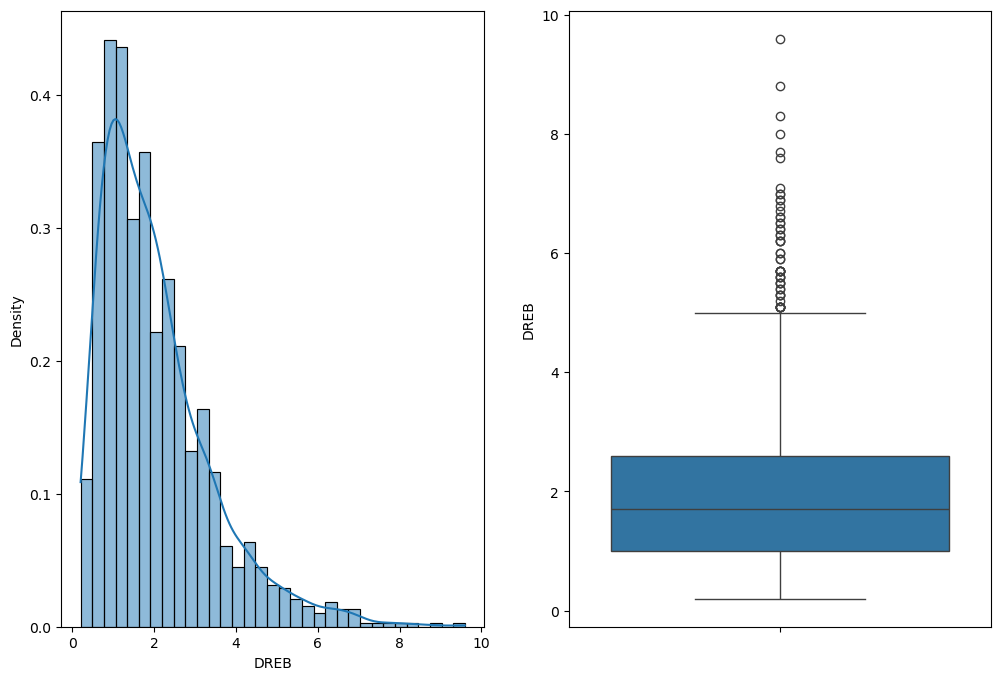

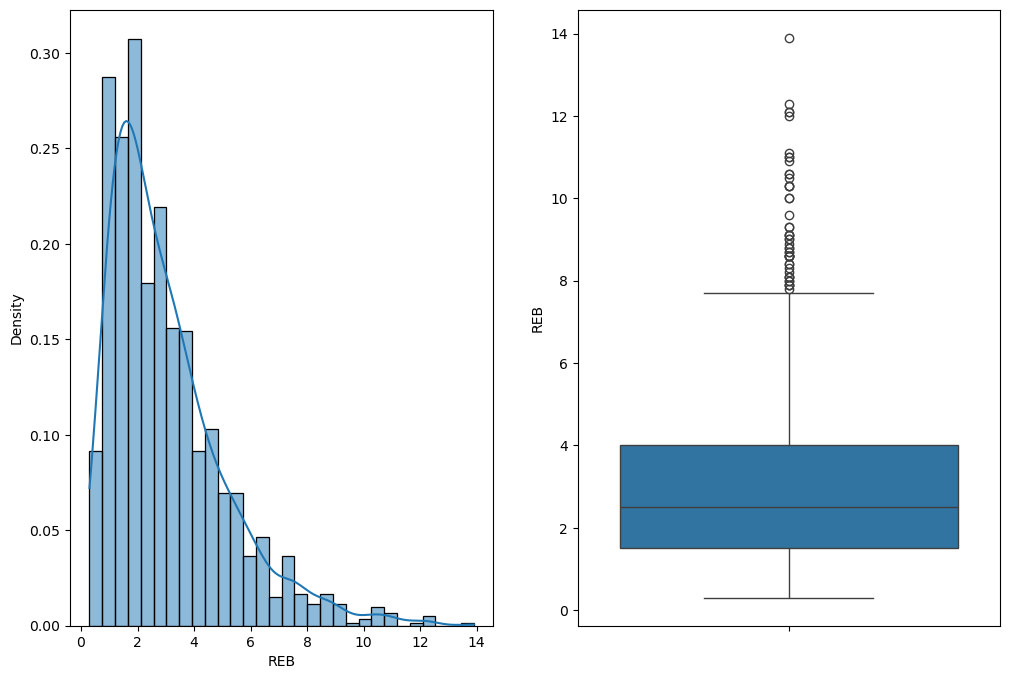

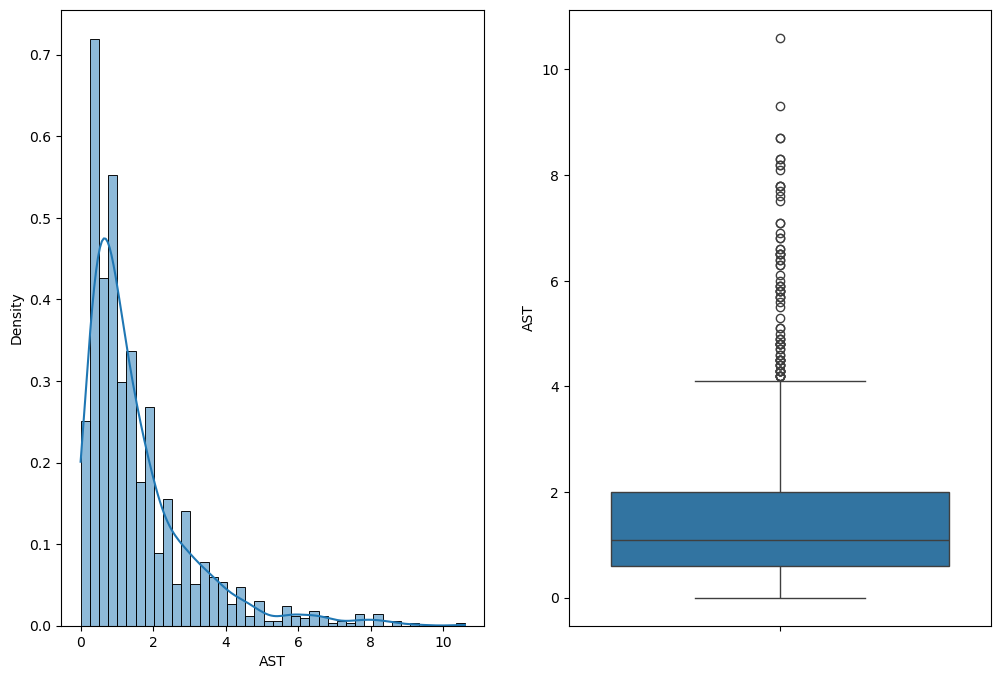

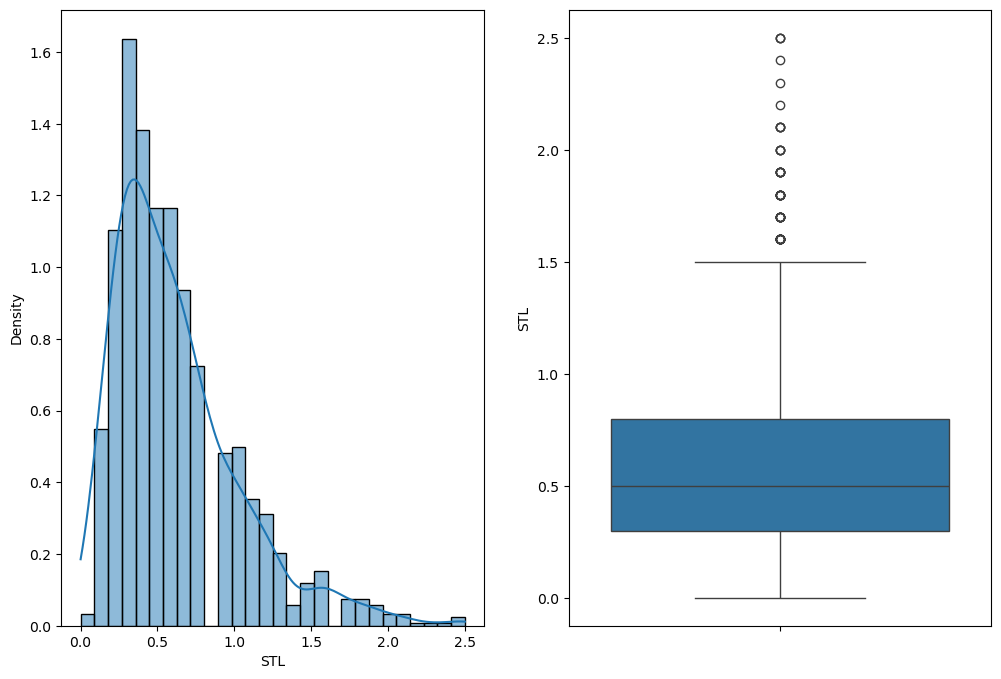

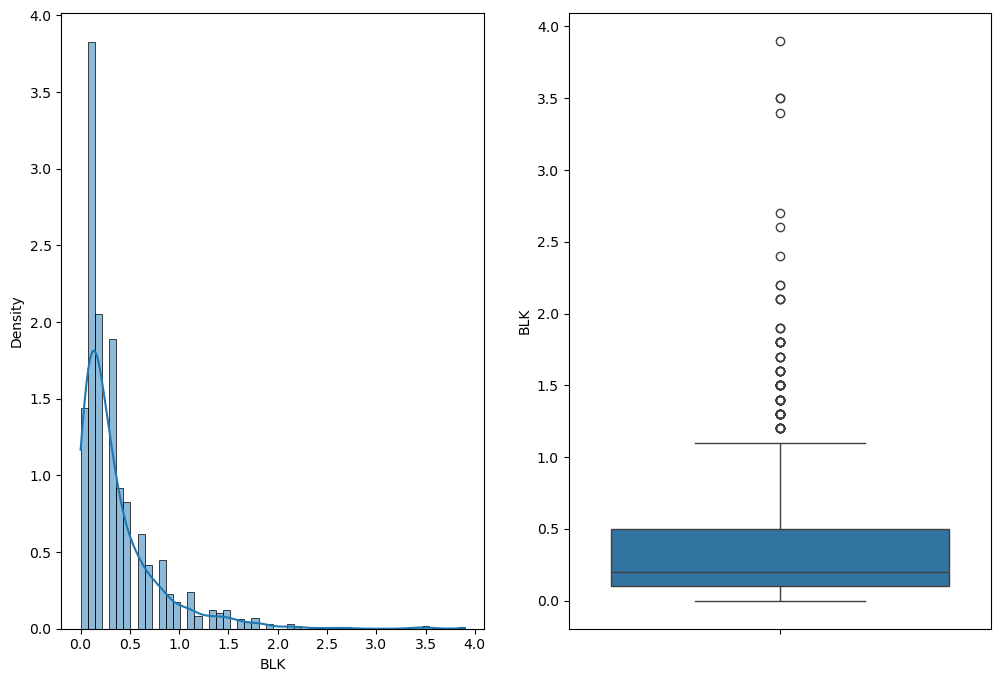

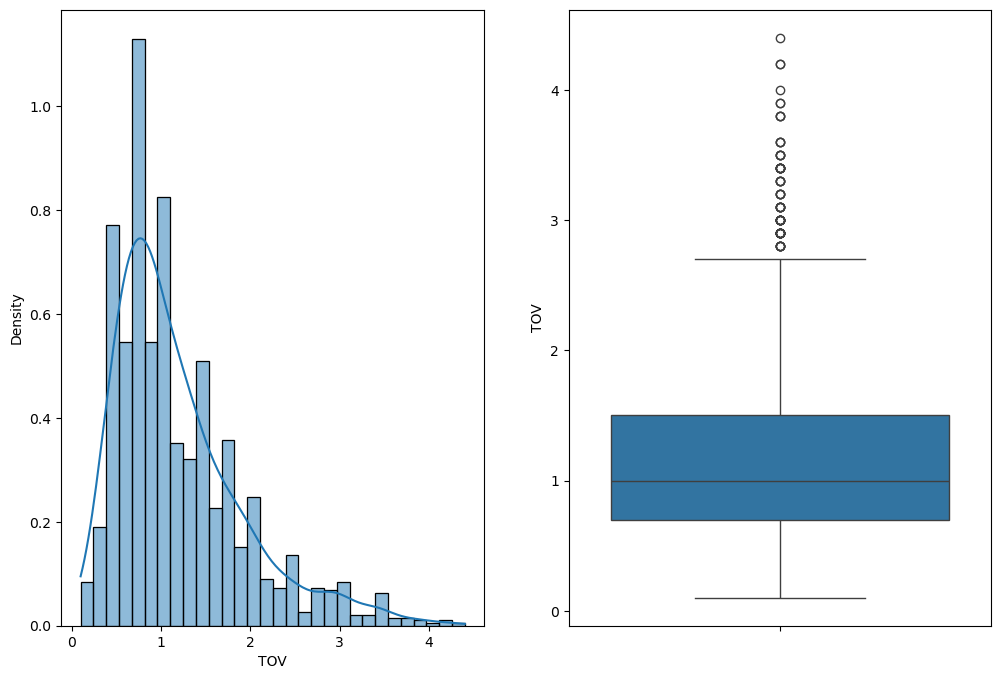

In [16]:
for col in feature_columns:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,8])
    sns.histplot(data=data, x = col, stat='density', kde=True, ax=ax1)
    sns.boxplot(data[col], ax=ax2)

In [17]:
data[data["MIN"] == data["MIN"].min()]

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
800,14,3.1,1.1,0.4,1.6,26.1,0.2,0.9,23.1,0.0,0.0,0.0,0.0,0.4,0.4,0.1,0.0,0.2,0.3,0.0


In [18]:
data[data["MIN"] == data["MIN"].max()]

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
1179,70,40.9,19.0,6.9,16.1,42.6,1.9,4.8,39.5,3.4,4.2,79.7,0.8,3.2,4.0,9.3,1.4,0.3,3.8,1.0


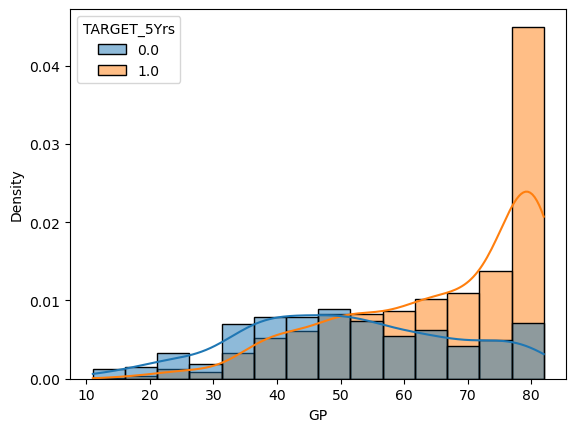

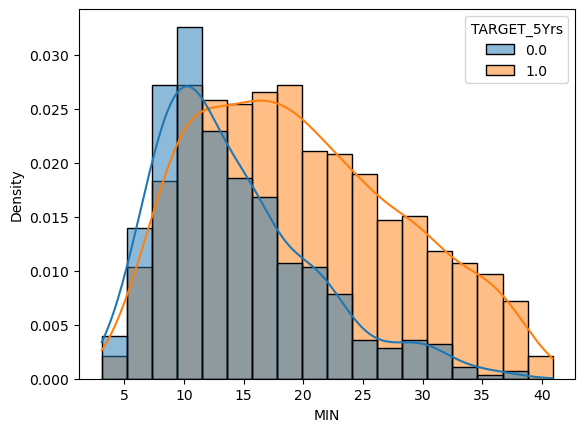

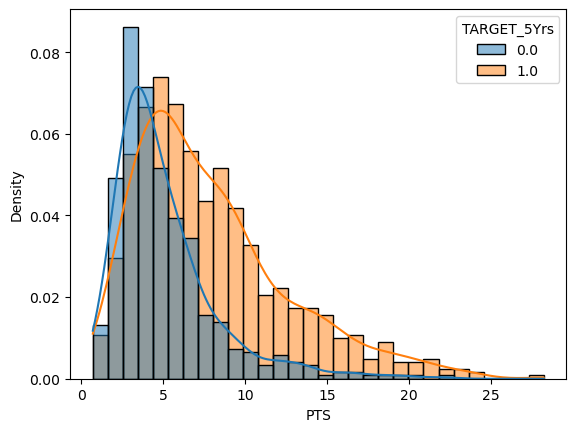

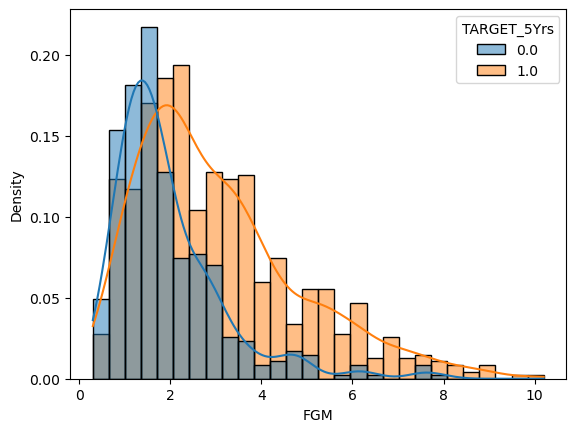

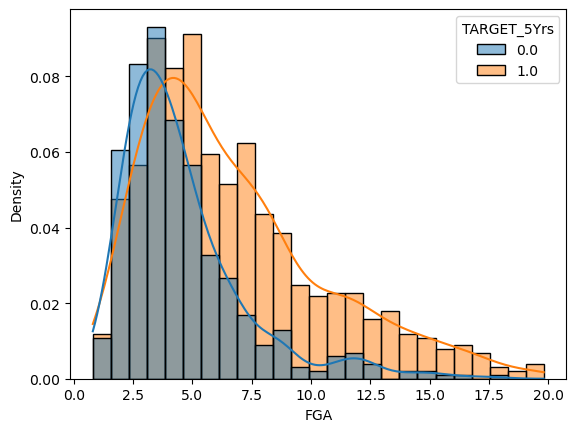

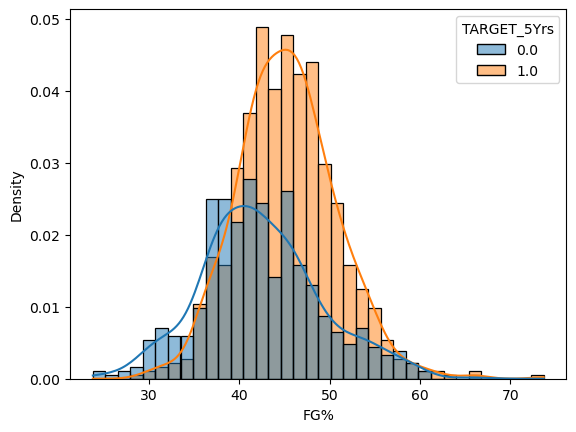

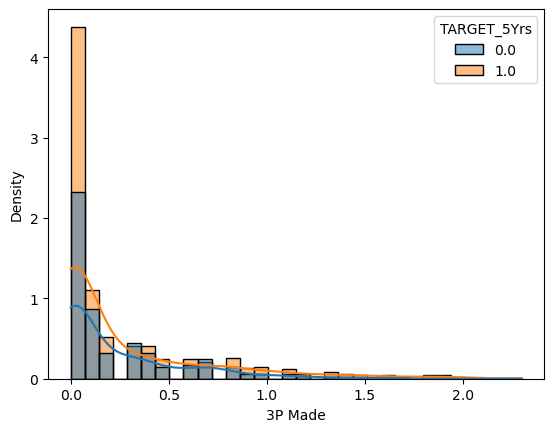

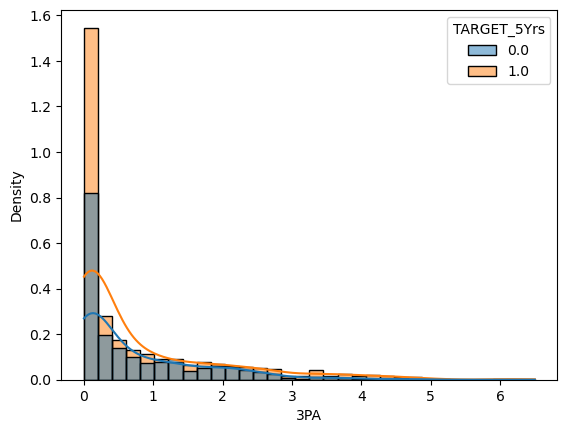

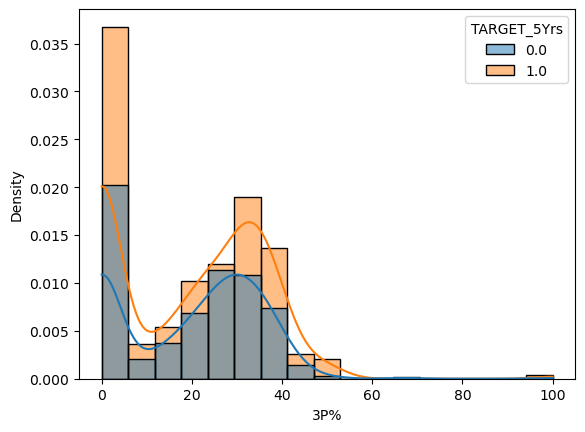

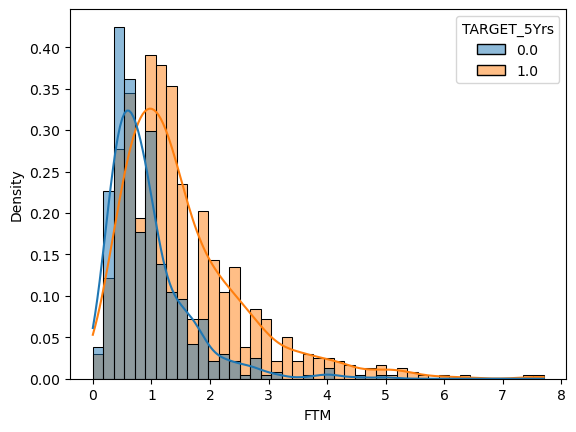

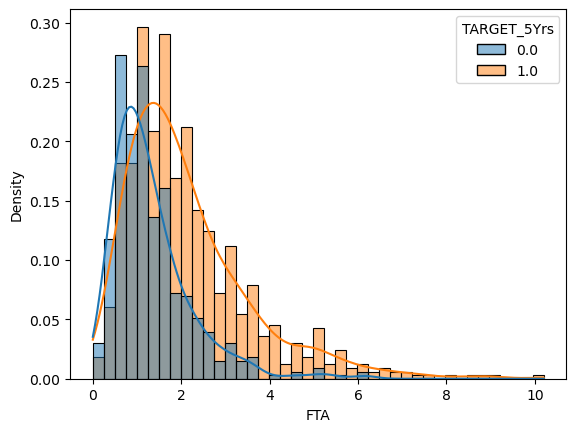

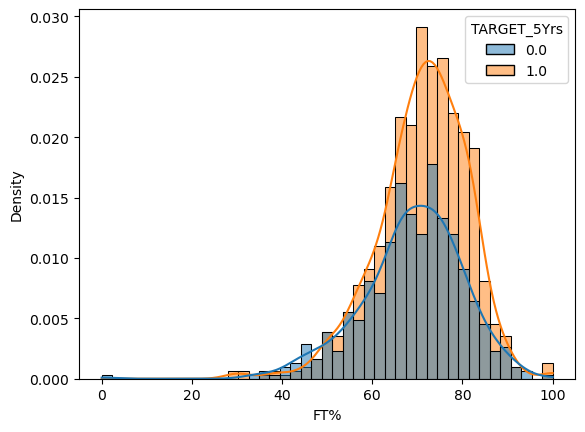

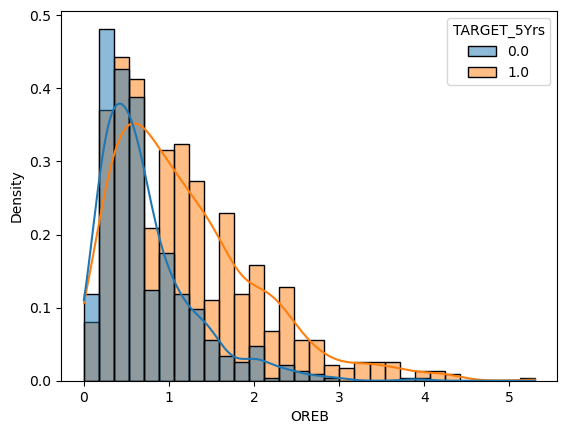

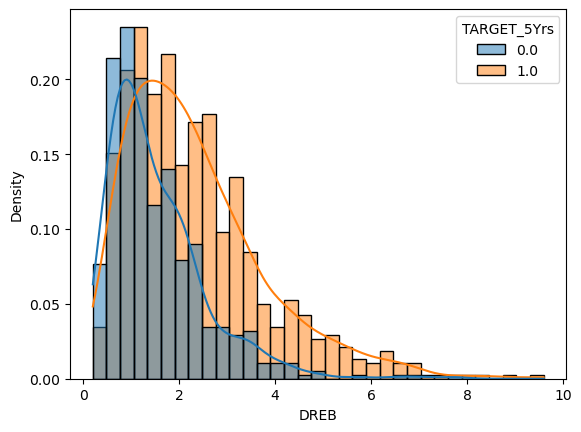

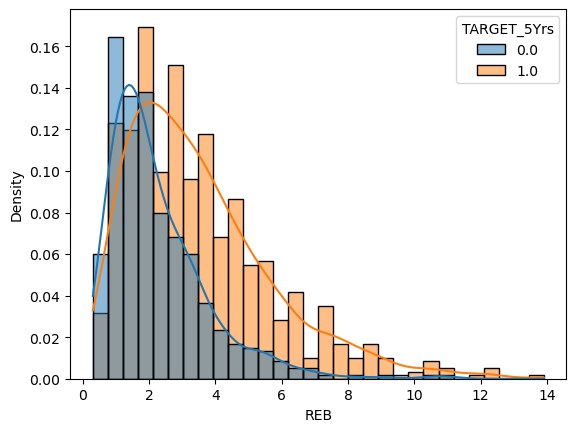

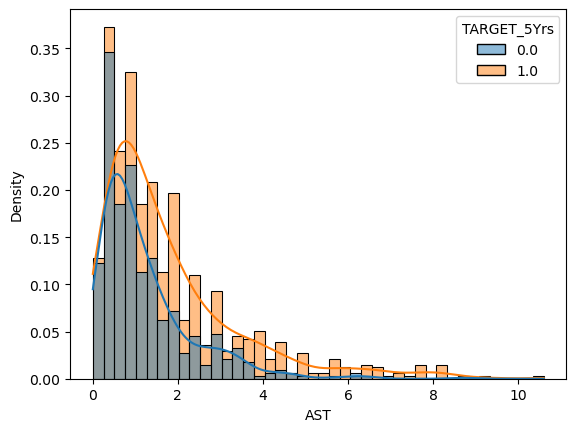

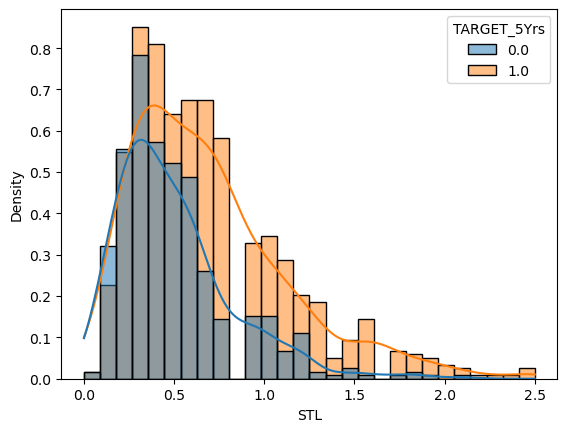

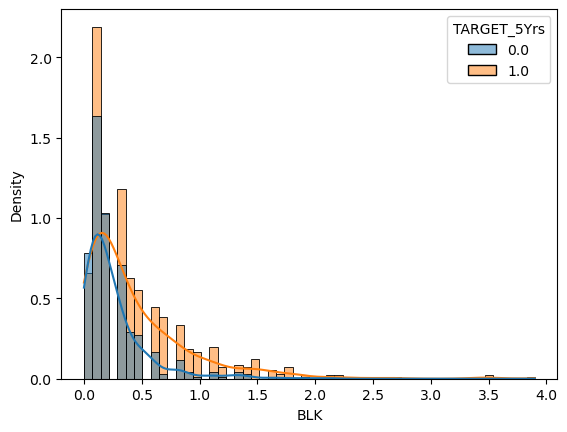

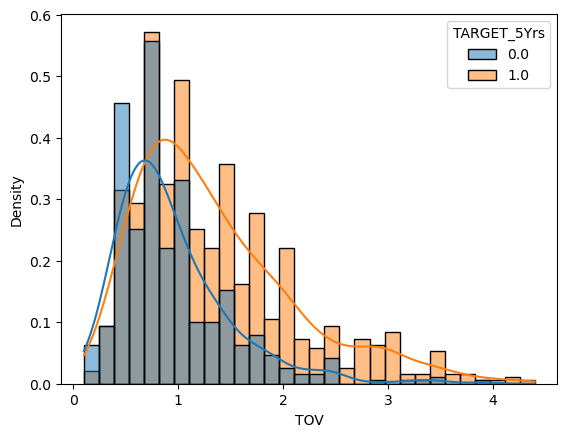

In [19]:
for col in feature_columns:
    plt.figure()
    sns.histplot(data=data, x = col, hue = "TARGET_5Yrs", stat='density', kde=True)

## Relations Variable/Variable

In [21]:
# sns.pairplot(data[data.columns[:-1]])

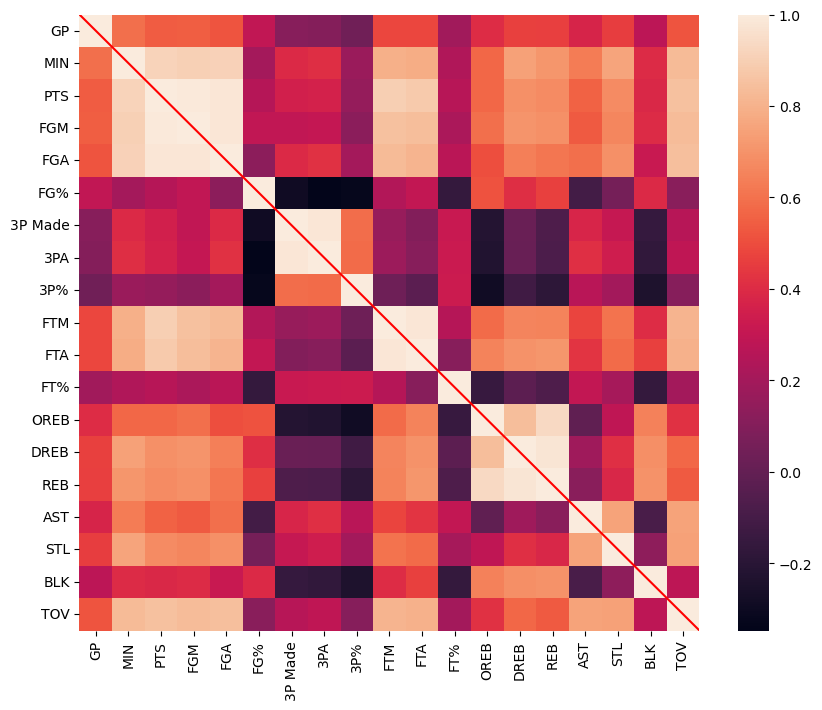

In [22]:
plt.figure(figsize=[10,8])
sns.heatmap(data[data.columns[:-1]].corr())
plt.plot(range(len(data.columns)), range(len(data.columns)), c='r')

<Figure size 500x400 with 0 Axes>

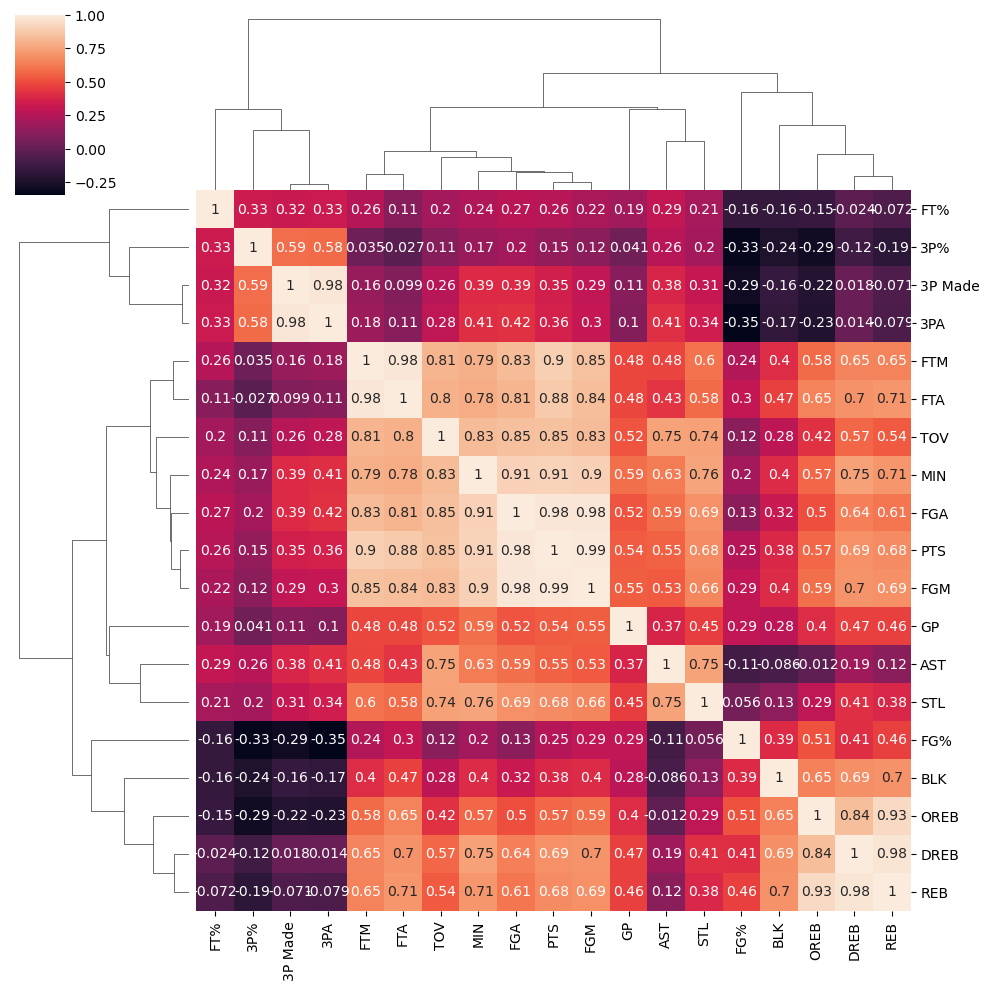

In [23]:
plt.figure(figsize=[5,4])
sns.clustermap(data[data.columns[:-1]].corr(), annot=True)

## Analyse aspects defensif vs offensif

In [25]:
defensive_variables = ['OREB', 'DREB', 'REB', 'STL', 'BLK', 'TOV']
offensive_variables = ['PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', "AST"]
time_variables = ["GP", "MIN"]

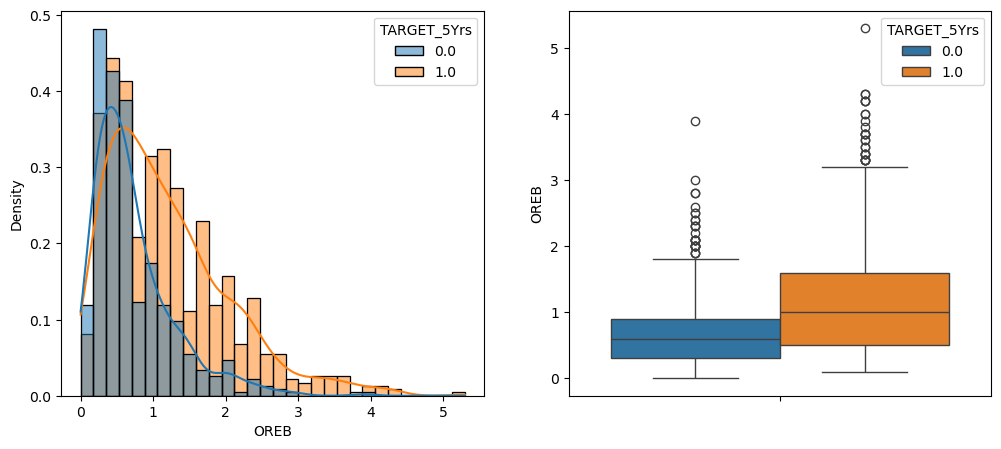

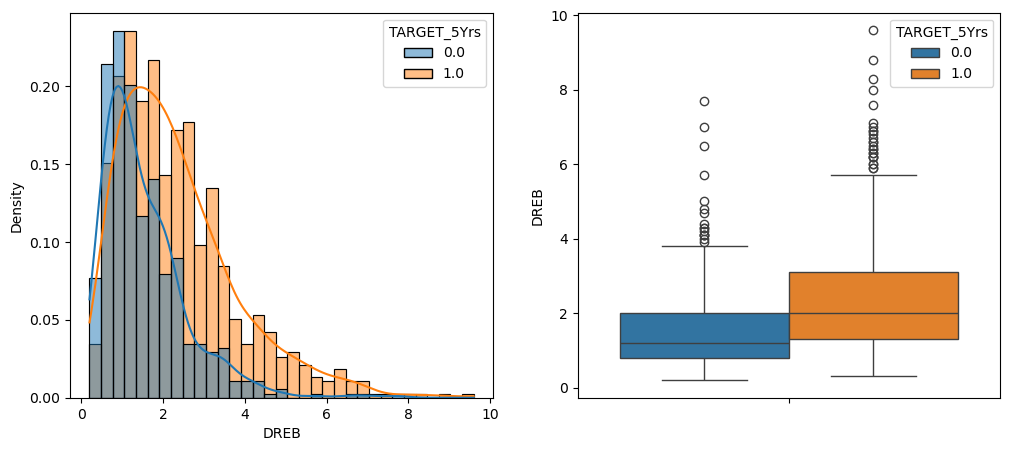

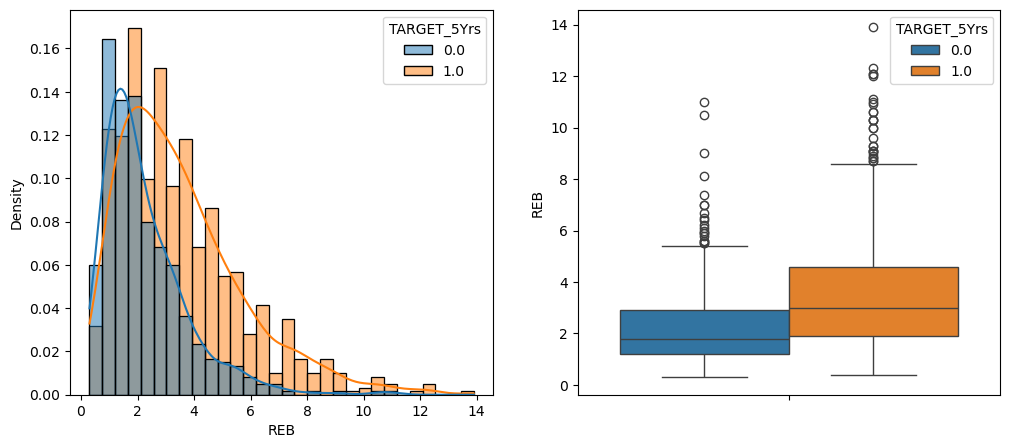

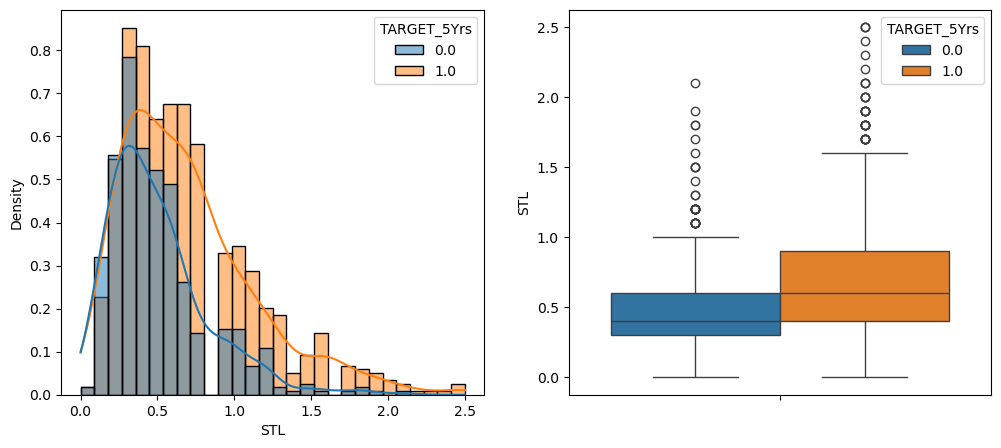

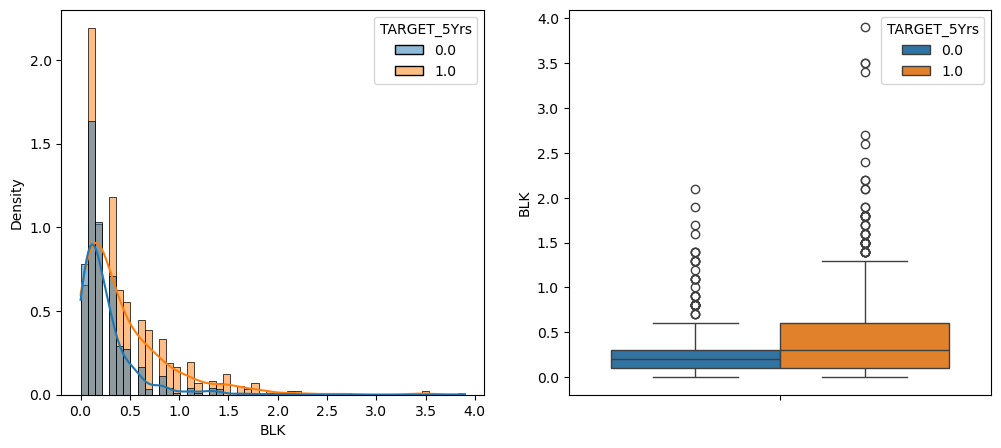

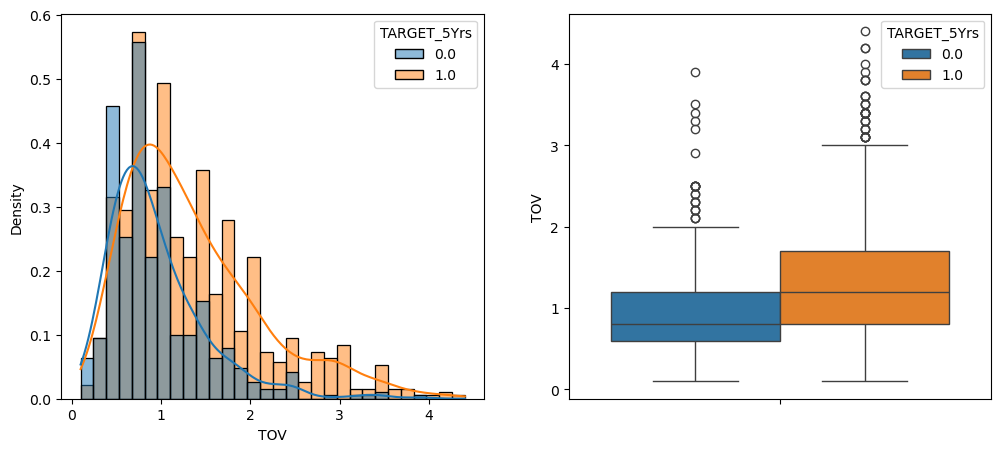

In [26]:
for var in defensive_variables:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
    sns.histplot(data=data, x = var, hue = "TARGET_5Yrs", stat='density', kde=True, ax=ax1)
    sns.boxplot(data=data, y = var, hue = "TARGET_5Yrs", ax=ax2)

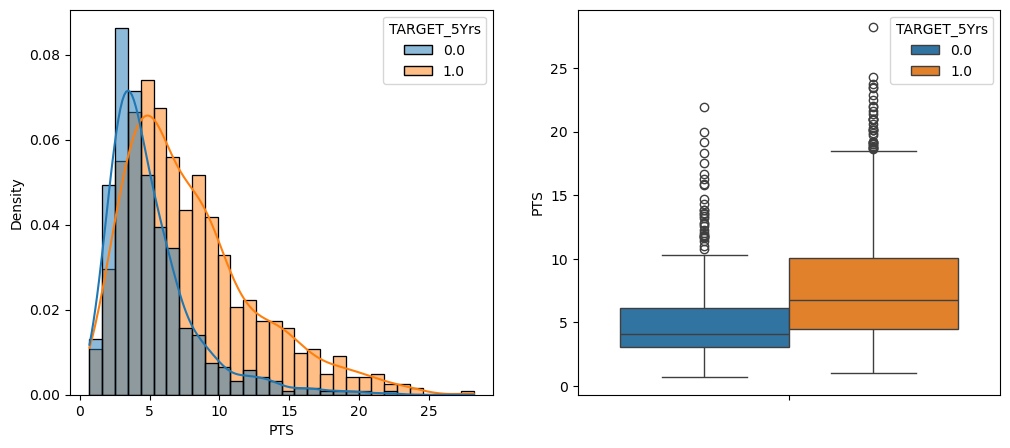

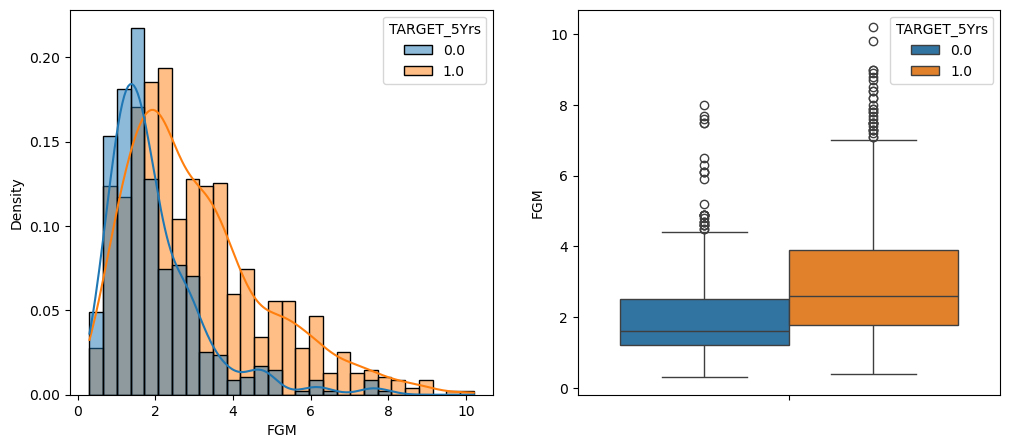

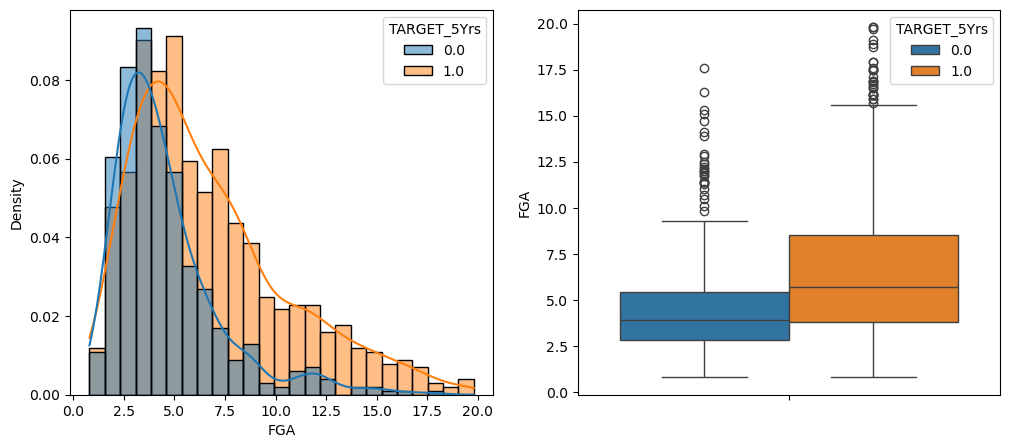

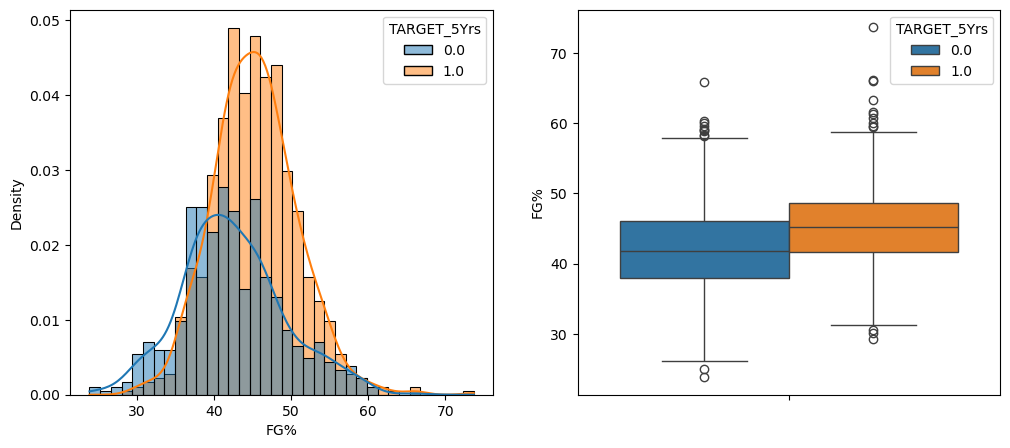

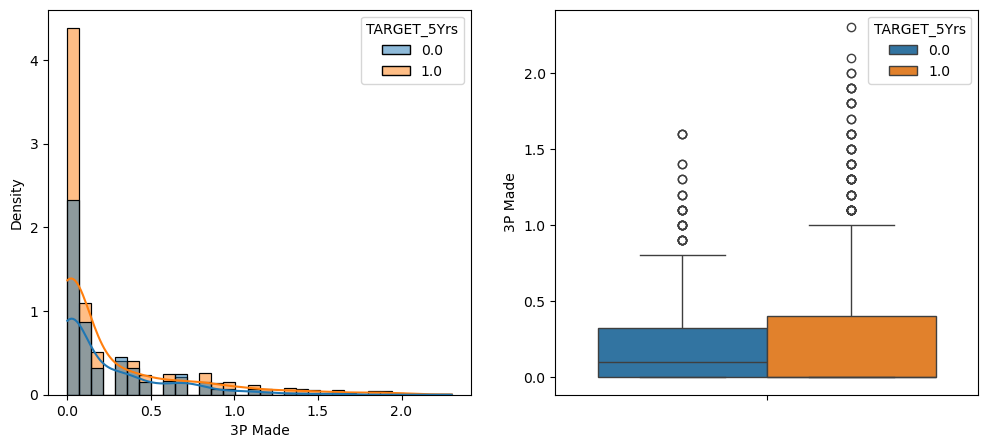

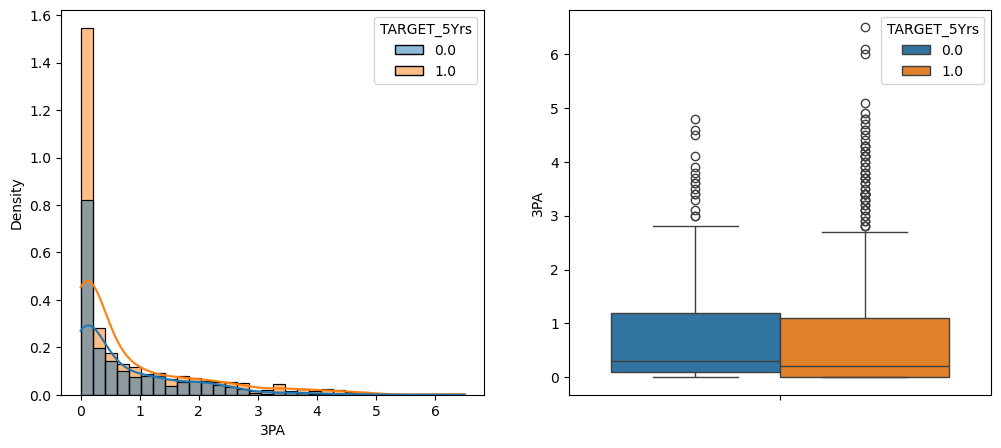

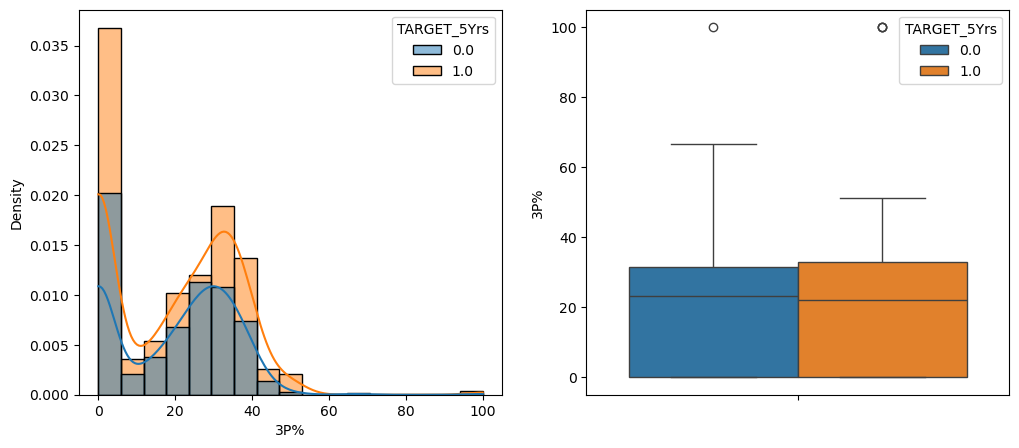

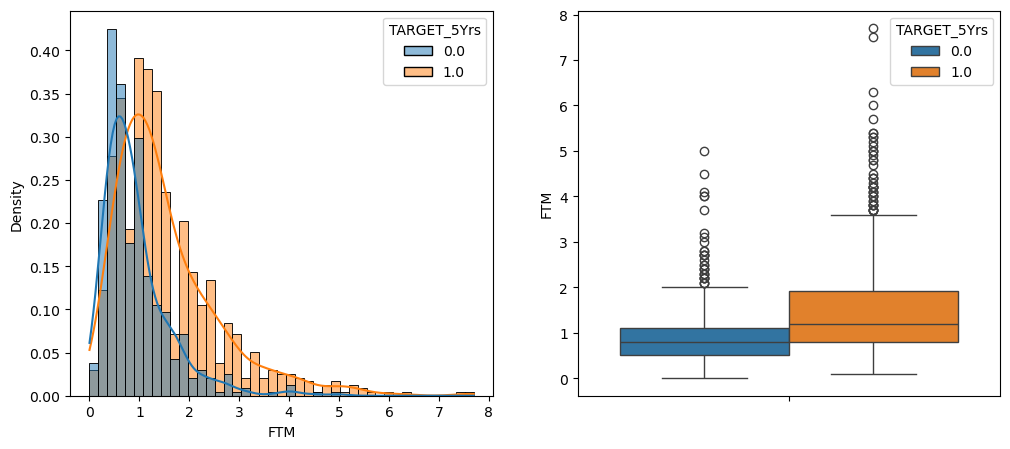

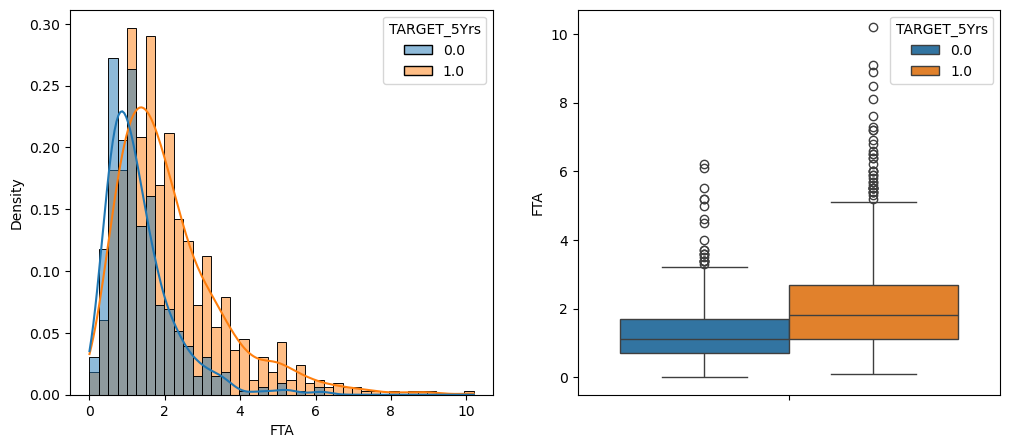

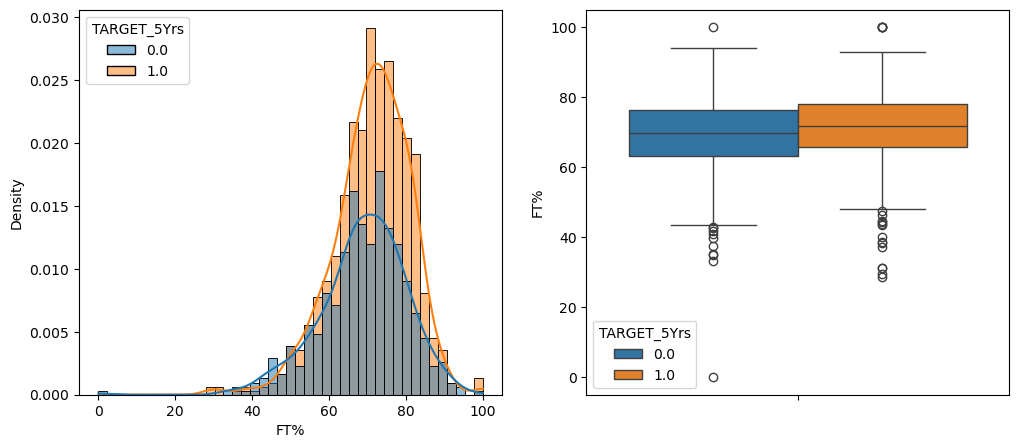

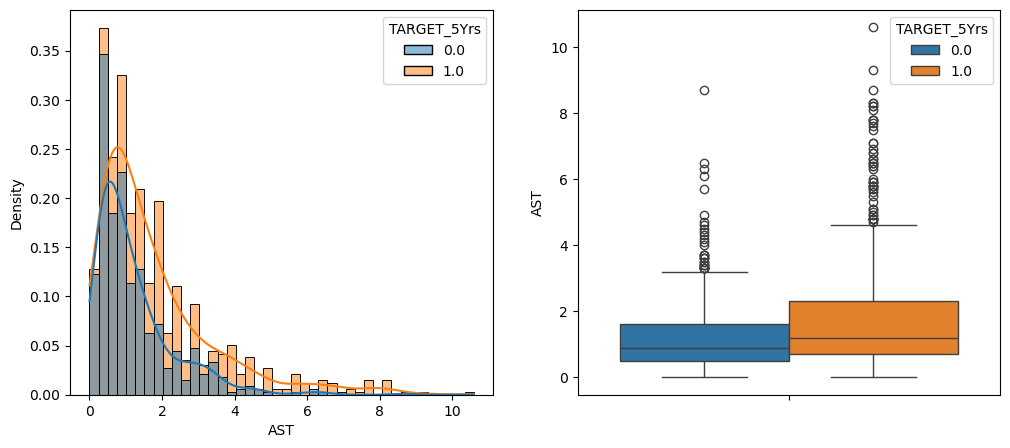

In [27]:
for var in offensive_variables:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
    sns.histplot(data=data, x = var, hue = "TARGET_5Yrs", stat='density', kde=True, ax=ax1)
    sns.boxplot(data=data, y = var, hue = "TARGET_5Yrs", ax=ax2)

## Tests statistique

In [29]:
from scipy.stats import ttest_ind

In [30]:
test_data = data.copy()
test_data.dropna(inplace=True)
more_than_5_years_data = test_data[test_data["TARGET_5Yrs"] == 1.]
less_than_5_years_data = test_data[test_data["TARGET_5Yrs"] == 0.]

In [31]:
less_than_5_years_data.shape

(499, 20)

In [32]:
more_than_5_years_data.shape

(819, 20)

In [33]:
def t_test(col):
    alpha = 0.01
    _, p = ttest_ind(more_than_5_years_data.sample(less_than_5_years_data.shape[0])[col], less_than_5_years_data[col])
    if p < alpha:
        return 'HO rejetée'
    else:
        return 'H0'

In [34]:
for col in test_data.columns[:-1]:
    test_result = t_test(col)
    print(f"{col :-<50}  {test_result}")

GP------------------------------------------------  HO rejetée
MIN-----------------------------------------------  HO rejetée
PTS-----------------------------------------------  HO rejetée
FGM-----------------------------------------------  HO rejetée
FGA-----------------------------------------------  HO rejetée
FG%-----------------------------------------------  HO rejetée
3P Made-------------------------------------------  H0
3PA-----------------------------------------------  H0
3P%-----------------------------------------------  H0
FTM-----------------------------------------------  HO rejetée
FTA-----------------------------------------------  HO rejetée
FT%-----------------------------------------------  HO rejetée
OREB----------------------------------------------  HO rejetée
DREB----------------------------------------------  HO rejetée
REB-----------------------------------------------  HO rejetée
AST-----------------------------------------------  HO rejetée
STL-------------

# Pre-Processing

In [36]:
data = df.copy()

data.drop_duplicates(inplace=True, ignore_index=True)
data.drop(columns=["Name"], inplace=True)

In [37]:
data.shape

(1328, 20)

In [38]:
data["TARGET_5Yrs"].value_counts(normalize=True)

TARGET_5Yrs
1.0    0.620482
0.0    0.379518
Name: proportion, dtype: float64

In [39]:
defensive_variables = ['OREB', 'DREB', 'REB', 'STL', 'BLK', 'TOV']
offensive_variables = ['PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', "AST"]
time_variables = ["GP", "MIN"]

## Minimum Pre-Processing

### Train test split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=0)

In [44]:
train_set["TARGET_5Yrs"].value_counts(normalize=True)

TARGET_5Yrs
1.0    0.620527
0.0    0.379473
Name: proportion, dtype: float64

In [45]:
test_set["TARGET_5Yrs"].value_counts(normalize=True)

TARGET_5Yrs
1.0    0.620301
0.0    0.379699
Name: proportion, dtype: float64

**On garde a peu pres les memes proportion donc c'est bien**

### Pre-Processing of data

In [48]:
def imputation(df):

    return df.dropna(axis=0)


def feature_engineering(df):
    del_columns = ["3P Made", "FTM", "3PA"]
    # del_columns = ['MIN', 'FGM', 'FGA', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'OREB', 'AST', 'STL', 'BLK', 'TOV']    
    df.drop(del_columns, axis=1, inplace=True)
    
    return df

def preprocessing(df, target_name):

    df = imputation(df)
    df = feature_engineering(df)

    X = df.drop(target_name, axis=1)
    y = df[target_name]

    return X, y

In [49]:
X_train, y_train = preprocessing(train_set, "TARGET_5Yrs")
X_test, y_test = preprocessing(test_set, "TARGET_5Yrs")

In [50]:
X_train_columns = X_train.columns

In [51]:
X_train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P%,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
1161,64,15.3,3.9,1.6,3.6,43.7,40.9,1.0,64.6,0.5,1.0,1.5,2.4,0.6,0.2,1.6
567,44,11.0,4.9,2.1,5.1,41.8,16.7,0.9,66.7,1.1,1.9,3.0,0.2,0.3,0.1,0.7
1269,81,21.9,5.8,2.4,5.0,47.9,0.0,1.3,72.9,3.7,3.8,7.5,1.2,0.8,0.4,1.2
49,56,9.6,3.4,1.4,3.0,45.6,0.0,1.0,65.5,0.5,0.8,1.2,1.1,0.6,0.2,0.8
589,60,20.7,7.9,3.5,5.7,60.8,50.0,2.7,37.1,2.8,4.8,7.6,0.5,1.0,1.6,0.9


In [52]:
# defensive_variables = ['OREB', 'DREB', 'REB', 'BLK', 'TOV']
# defensive_indices = {col: X_train.columns.get_loc(col) for col in defensive_variables}

# offensive_variables = ['PTS', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTA', 'FT%', "AST"]
# offensive_indices = {col: X_train.columns.get_loc(col) for col in offensive_variables}

# time_variables = ["GP", "MIN"]
# time_indices = {col: X_train.columns.get_loc(col) for col in time_variables}

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [54]:
scaler = StandardScaler()
featuring = PolynomialFeatures(2)
prep_step_model = make_pipeline(featuring, RandomForestClassifier())
prep_step_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('randomforestclassifier', RandomForestClassifier())])

## Procedure d'evaluation

In [56]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import KFold, ShuffleSplit

In [57]:
# Custom recall du cahier de charges
def score_classifier(dataset, classifier, labels, show_confusion=True):
    import numpy as np
    from sklearn.model_selection import KFold
    from sklearn.metrics import confusion_matrix, recall_score

    """
    Performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores.
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return:
    """

    kf = KFold(n_splits=3, random_state=50, shuffle=True)
    confusion_mat = np.zeros((2, 2))
    recall = 0

    for training_ids, test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set, training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat += confusion_matrix(test_labels, predicted_labels)
        recall += recall_score(test_labels, predicted_labels)

    recall /= 3

    if show_confusion:
        print("Special recall:", recall)
        fig, ax = plt.subplots()
        sns.heatmap(confusion_mat.astype(np.uint8), cbar=False, annot=True, fmt='d', ax=ax)
        plt.show()

    return recall

In [58]:
def evaluation(model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    print(f"---- Custom score function")
    print("Custom recall on Test data")
    score_classifier(X_test.to_numpy(), model, y_test.to_numpy())
    print(f"-----")

    N, train_score, val_score = learning_curve(model, X_train, y_train, scoring="f1",
                                               cv=5, train_sizes=np.linspace(0.1,1,10))

    fig = plt.figure()
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='Validation score')
    plt.legend()
    plt.show()
    # 77, 71

              precision    recall  f1-score   support

         0.0       0.63      0.58      0.60       100
         1.0       0.76      0.79      0.78       165

    accuracy                           0.71       265
   macro avg       0.69      0.69      0.69       265
weighted avg       0.71      0.71      0.71       265

---- Custom score function
Custom recall on Test data
Special recall: 0.8661129668081009


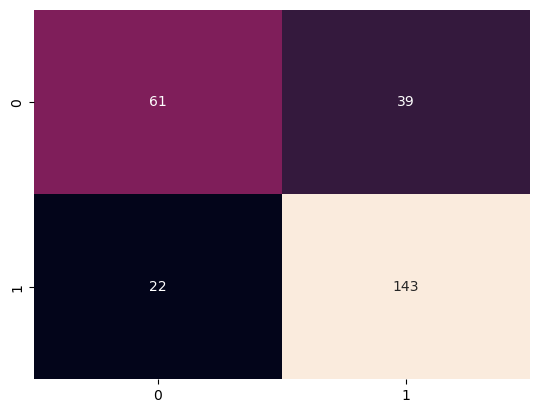

-----


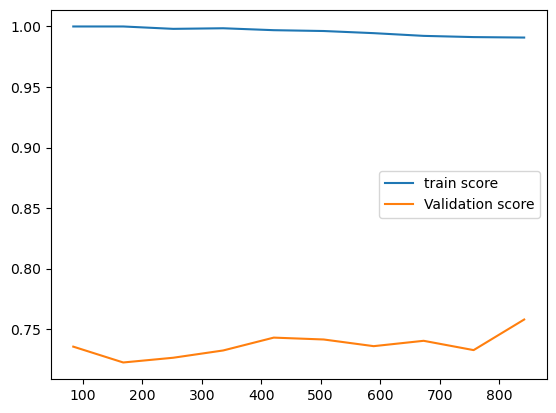

In [59]:
evaluation(prep_step_model)

## Premiere Modélisation

In [61]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

In [62]:
decisionTree = make_pipeline(scaler, DecisionTreeClassifier(max_depth=2, random_state=0))

randomForest = make_pipeline(scaler, RandomForestClassifier(max_depth=2, random_state=0))
adaBoost = make_pipeline(scaler, AdaBoostClassifier(random_state=0))

svm = make_pipeline(scaler, SVC(random_state=0))
knn = make_pipeline(scaler, KNeighborsClassifier())

gradBoost = make_pipeline(scaler, GradientBoostingClassifier(random_state=0))

In [63]:
list_of_models = [decisionTree, randomForest, gradBoost, adaBoost, svm, knn]
list_of_names = ["decisionTree", "randomForest", "gradBoost", "adaBoost", "svm", "knn"]

dict_of_models = dict(zip(list_of_names, list_of_models))

decisionTree
              precision    recall  f1-score   support

         0.0       0.58      0.46      0.51       100
         1.0       0.71      0.80      0.75       165

    accuracy                           0.67       265
   macro avg       0.65      0.63      0.63       265
weighted avg       0.66      0.67      0.66       265

---- Custom score function
Custom recall on Test data
Special recall: 0.9146780616492632


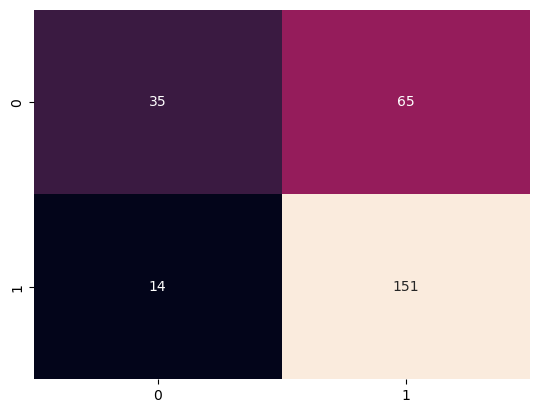

-----


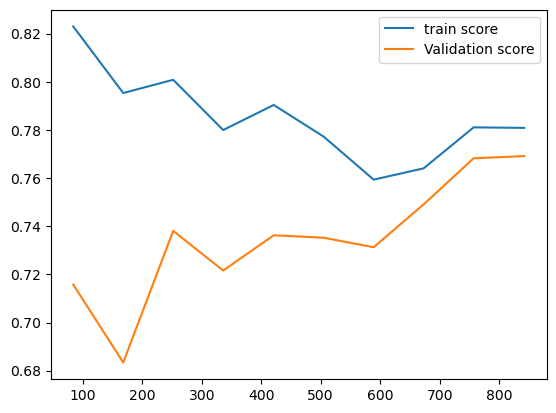

randomForest
              precision    recall  f1-score   support

         0.0       0.66      0.47      0.55       100
         1.0       0.73      0.85      0.79       165

    accuracy                           0.71       265
   macro avg       0.69      0.66      0.67       265
weighted avg       0.70      0.71      0.70       265

---- Custom score function
Custom recall on Test data
Special recall: 0.8652302568886482


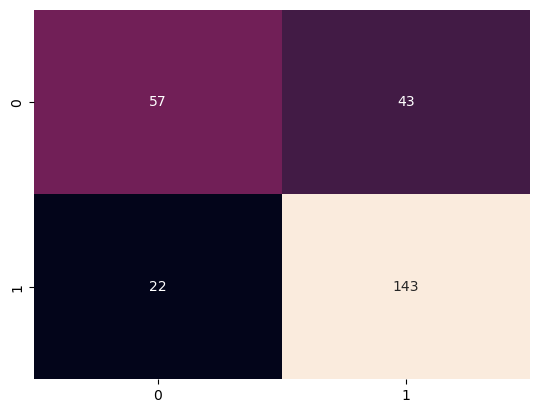

-----


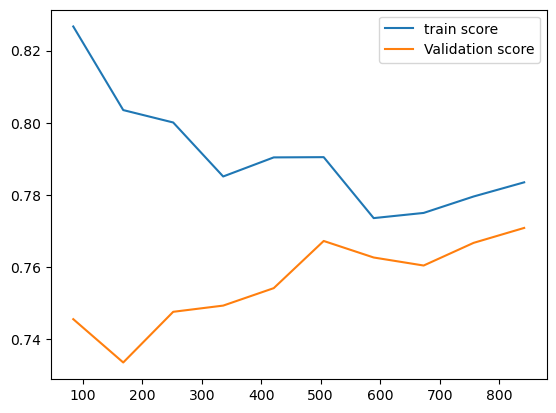

gradBoost
              precision    recall  f1-score   support

         0.0       0.68      0.52      0.59       100
         1.0       0.75      0.85      0.80       165

    accuracy                           0.73       265
   macro avg       0.72      0.69      0.69       265
weighted avg       0.72      0.73      0.72       265

---- Custom score function
Custom recall on Test data
Special recall: 0.8106206052581424


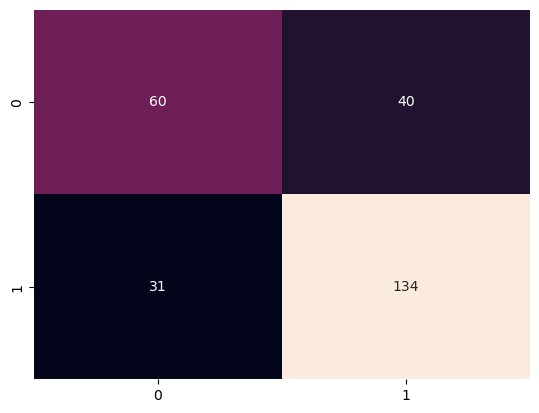

-----


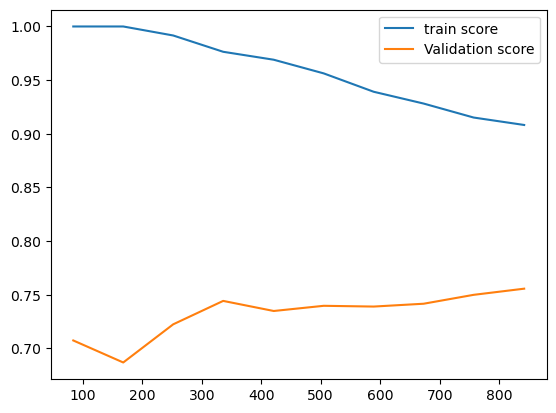

adaBoost
              precision    recall  f1-score   support

         0.0       0.65      0.46      0.54       100
         1.0       0.72      0.85      0.78       165

    accuracy                           0.70       265
   macro avg       0.68      0.65      0.66       265
weighted avg       0.69      0.70      0.69       265

---- Custom score function
Custom recall on Test data
Special recall: 0.7881275515833609


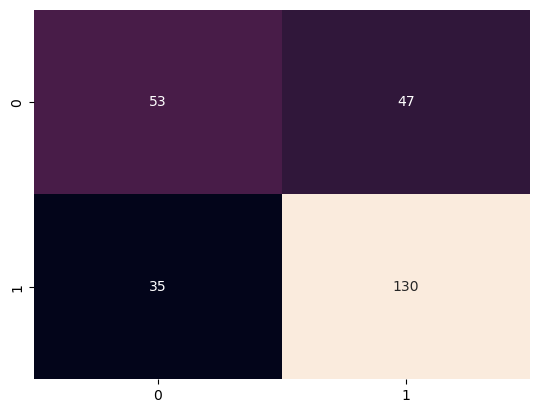

-----


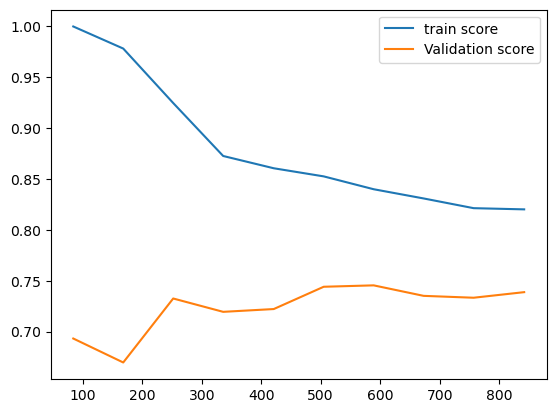

svm
              precision    recall  f1-score   support

         0.0       0.71      0.52      0.60       100
         1.0       0.75      0.87      0.81       165

    accuracy                           0.74       265
   macro avg       0.73      0.70      0.70       265
weighted avg       0.74      0.74      0.73       265

---- Custom score function
Custom recall on Test data
Special recall: 0.8416097419076566


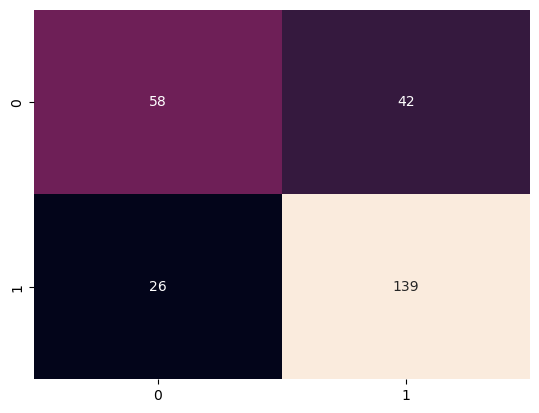

-----


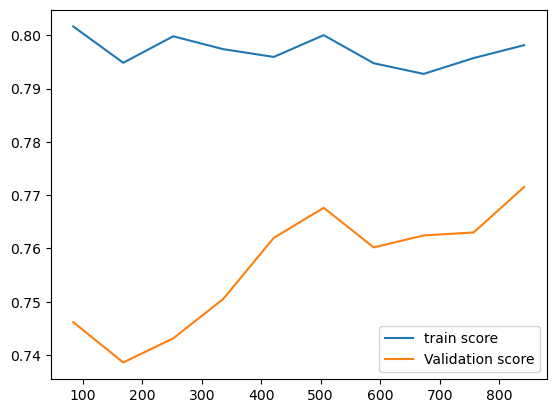

knn
              precision    recall  f1-score   support

         0.0       0.59      0.48      0.53       100
         1.0       0.72      0.79      0.75       165

    accuracy                           0.68       265
   macro avg       0.65      0.64      0.64       265
weighted avg       0.67      0.68      0.67       265

---- Custom score function
Custom recall on Test data
Special recall: 0.7991534009408885


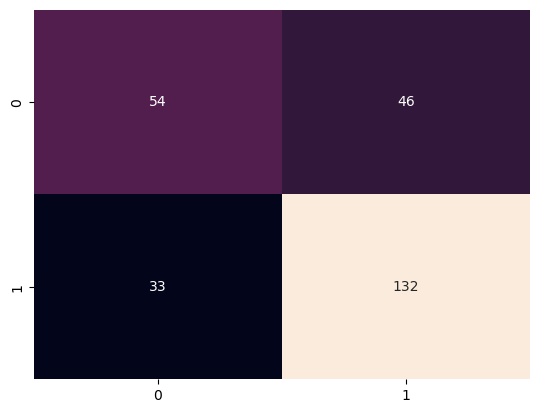

-----


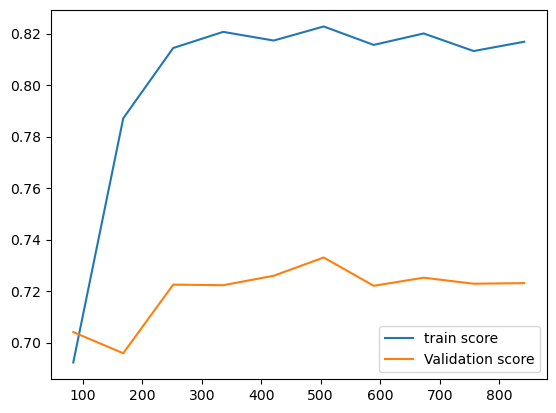

In [64]:
for model_name, model in dict_of_models.items():
    print(model_name)
    evaluation(model)

# Optimisation

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve, f1_score, recall_score

In [67]:
def optimize_and_evaluate(model_to_optimize, param_grid, X_train, y_train, X_test, y_test, evaluation_fn, scoring_method="f1"):

    grid_search = GridSearchCV(model_to_optimize, param_grid=param_grid, cv=5, scoring=scoring_method)
    grid_search.fit(X_train, y_train)

    best_estimator = grid_search.best_estimator_

    evaluation_fn(best_estimator)

    y_pred = best_estimator.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    return best_estimator, f1

## DecisionTree

In [69]:
# decisionTree.get_params()

              precision    recall  f1-score   support

         0.0       0.58      0.46      0.51       100
         1.0       0.71      0.80      0.75       165

    accuracy                           0.67       265
   macro avg       0.65      0.63      0.63       265
weighted avg       0.66      0.67      0.66       265

---- Custom score function
Custom recall on Test data
Special recall: 0.9146780616492632


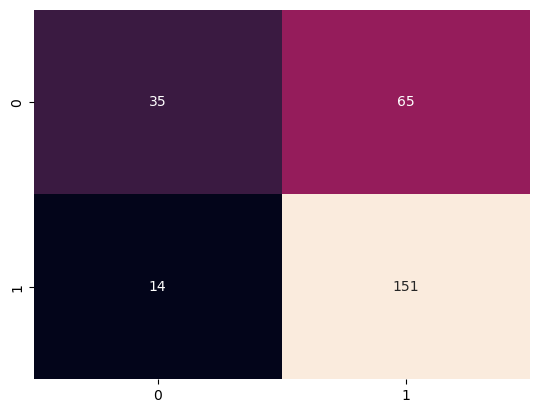

-----


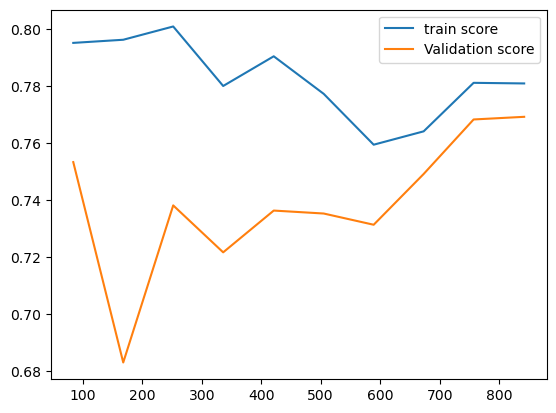

Best estimator


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=0))])

F1 score on Test data:  0.8131313131313131


In [70]:
params_to_optimize = {"decisiontreeclassifier__max_depth":[1,2,3,4,5],
                      # "pca__n_components":[2,3,4,5,6],
                      'decisiontreeclassifier__min_samples_leaf': [10, 20, 30],
                      'decisiontreeclassifier__min_samples_split': [20, 30, 40]}

best_decisionTree_estimator, f1 = optimize_and_evaluate(
    model_to_optimize=decisionTree,
    param_grid=params_to_optimize,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    evaluation_fn=evaluation,
)

print("Best estimator")
display(best_decisionTree_estimator)
print("F1 score on Test data: ", f1)

In [71]:
y_pred = best_decisionTree_estimator.predict(X_test)

<Axes: >

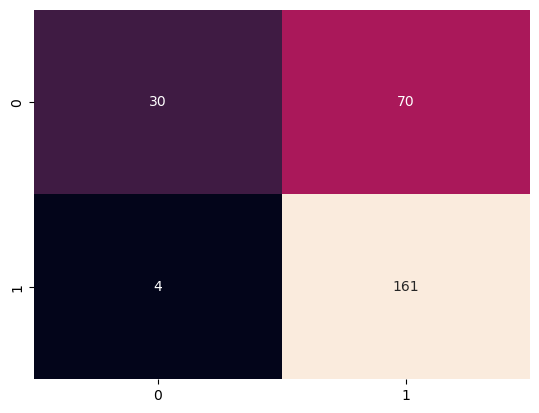

In [72]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, fmt='d')

In [73]:
accuracy_score(y_test, y_pred)

0.720754716981132

In [74]:
f1_score(y_test, y_pred)

0.8131313131313131

In [75]:
recall_score(y_test, y_pred, pos_label=1)

0.9757575757575757

## RandomForest

In [77]:
# randomForest.get_params()

              precision    recall  f1-score   support

         0.0       0.64      0.49      0.56       100
         1.0       0.73      0.84      0.78       165

    accuracy                           0.71       265
   macro avg       0.69      0.66      0.67       265
weighted avg       0.70      0.71      0.70       265

---- Custom score function
Custom recall on Test data
Special recall: 0.8175639212382012


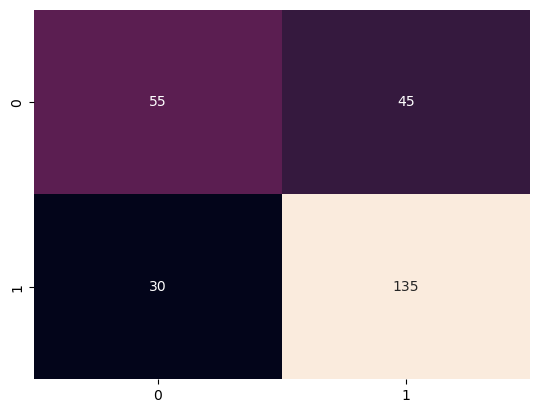

-----


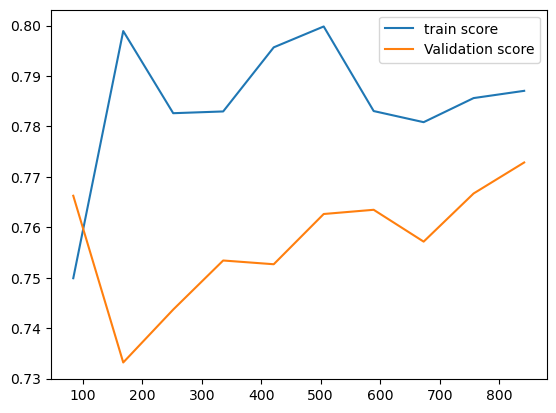

Best estimator


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, min_samples_leaf=30,
                                        min_samples_split=20,
                                        random_state=0))])

F1 score on Test data:  0.8012232415902141


In [78]:
params_to_optimize = {"randomforestclassifier__n_estimators":[100, 200, 300],
                      "randomforestclassifier__max_depth":[1,2,3],
                      'randomforestclassifier__min_samples_leaf': [10, 20, 30],
                      'randomforestclassifier__min_samples_split': [20, 30, 40]}

best_randomForest_estimator, f1 = optimize_and_evaluate(
    model_to_optimize=randomForest,
    param_grid=params_to_optimize,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    evaluation_fn=evaluation,
)

print("Best estimator")
display(best_randomForest_estimator)
print("F1 score on Test data: ", f1)

In [79]:
y_pred = best_randomForest_estimator.predict(X_test)

<Axes: >

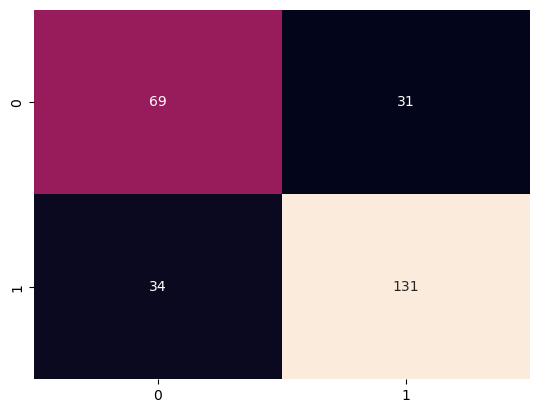

In [80]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, fmt='d')

In [81]:
accuracy_score(y_test, y_pred)

0.7547169811320755

In [82]:
f1_score(y_test, y_pred)

0.8012232415902141

In [83]:
recall_score(y_test, y_pred)

0.793939393939394

## SVM

In [85]:
# svm.get_params()

              precision    recall  f1-score   support

         0.0       0.71      0.52      0.60       100
         1.0       0.75      0.87      0.81       165

    accuracy                           0.74       265
   macro avg       0.73      0.70      0.70       265
weighted avg       0.74      0.74      0.73       265

---- Custom score function
Custom recall on Test data
Special recall: 0.8416097419076566


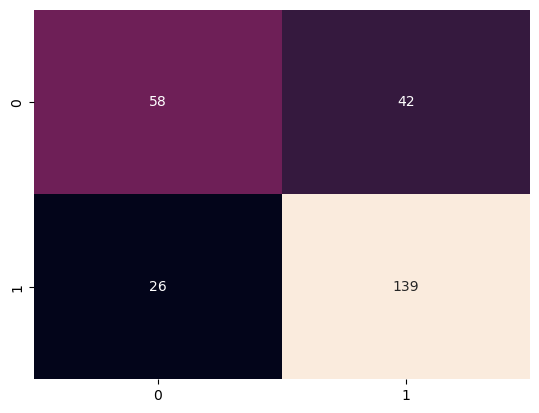

-----


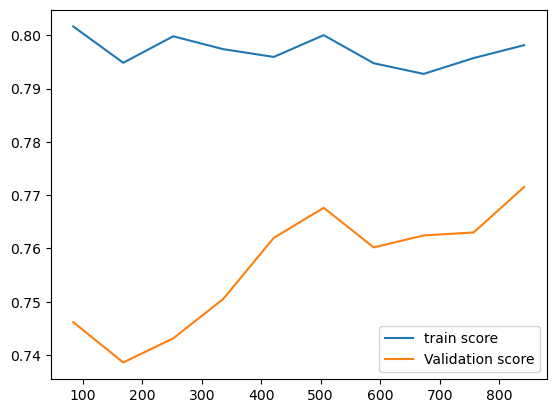

Best estimator


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, random_state=0))])

F1 score on Test data:  0.8298507462686567


In [86]:
params_to_optimize = {
    "svc__C": [0.01, 0.1, 1, 10],
}

best_svm_estimator, f1 = optimize_and_evaluate(
    model_to_optimize=svm,
    param_grid=params_to_optimize,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    evaluation_fn=evaluation,
)

print("Best estimator")
display(best_svm_estimator)
print("F1 score on Test data: ", f1)

### Precision-Recall curve

In [88]:
precision_svm, recal_svm, thresholds_svm = precision_recall_curve(y_test, best_svm_estimator.decision_function(X_test))

Text(0.5, 1.0, 'Precision-Recall function')

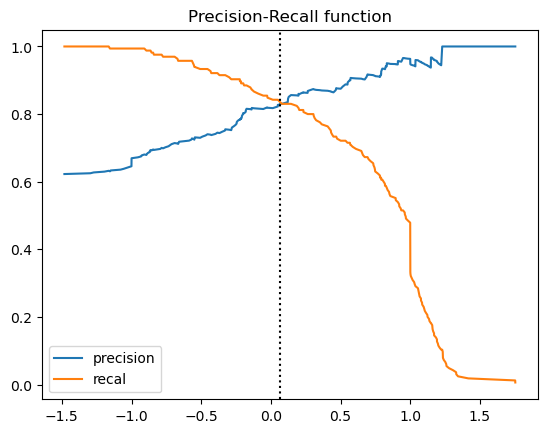

In [89]:
import matplotlib.pyplot as plt
plt.plot(thresholds_svm, precision_svm[:-1], label='precision')
plt.plot(thresholds_svm, recal_svm[:-1], label='recal')
plt.legend()

threshold = thresholds_svm[precision_svm[:-1] < recal_svm[:-1]][-1]
plt.axvline(threshold,c='k', linestyle=':')
plt.title("Precision-Recall function")

In [90]:
def final_model(model, X, threshold):
    return model.decision_function(X) > threshold

In [91]:
y_pred = final_model(best_svm_estimator, X_test, threshold)

In [92]:
accuracy_score(y_test, y_pred)

0.7886792452830189

In [93]:
f1_score(y_test, y_pred)

0.8303030303030303

In [94]:
recall_score(y_test, y_pred)

0.8303030303030303

<Axes: >

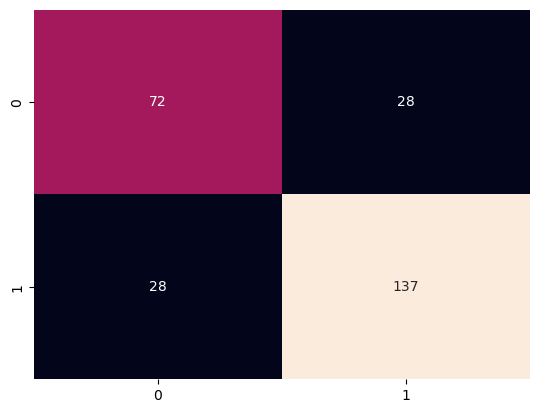

In [95]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cbar=False)

## AdaBoost

In [97]:
adaBoost.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('adaboostclassifier', AdaBoostClassifier(random_state=0))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'adaboostclassifier': AdaBoostClassifier(random_state=0),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'adaboostclassifier__algorithm': 'SAMME.R',
 'adaboostclassifier__estimator': None,
 'adaboostclassifier__learning_rate': 1.0,
 'adaboostclassifier__n_estimators': 50,
 'adaboostclassifier__random_state': 0}

              precision    recall  f1-score   support

         0.0       0.71      0.53      0.61       100
         1.0       0.75      0.87      0.81       165

    accuracy                           0.74       265
   macro avg       0.73      0.70      0.71       265
weighted avg       0.74      0.74      0.73       265

---- Custom score function
Custom recall on Test data
Special recall: 0.7989407480966567


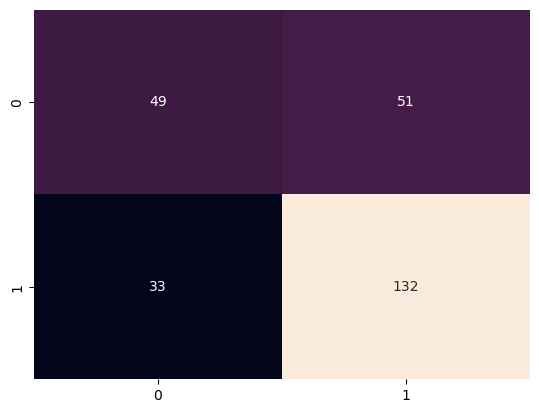

-----


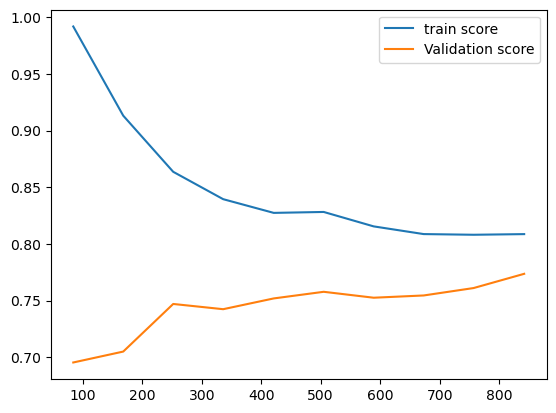

Best estimator


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=200,
                                    random_state=0))])

F1 score on Test data:  0.8942598187311178


In [98]:
params_to_optimize = {"adaboostclassifier__learning_rate":[0.1, 0.2, 0.5, 1],
                      "adaboostclassifier__n_estimators": [100,200,400],
                     }

best_adaBoost_estimator, f1 = optimize_and_evaluate(
    model_to_optimize=adaBoost,
    param_grid=params_to_optimize,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    evaluation_fn=evaluation,
)

print("Best estimator")
display(best_adaBoost_estimator)
print("F1 score on Test data: ", f1)

### Precision-Recall curve

In [100]:
from sklearn.metrics import precision_recall_curve, f1_score, recall_score

In [101]:
precision_ada, recal_ada, thresholds_ada = precision_recall_curve(y_test, best_adaBoost_estimator.decision_function(X_test))

Text(0.5, 1.0, 'Precision-Recall function')

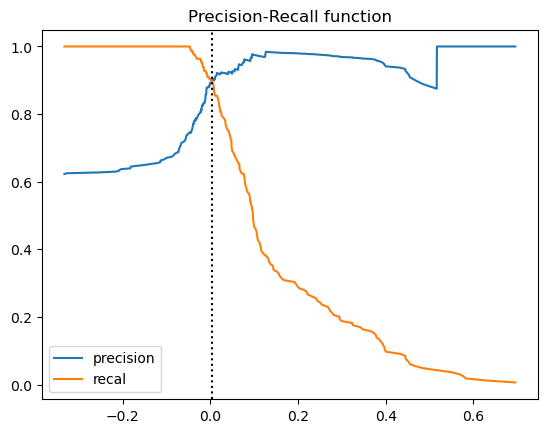

In [102]:
import matplotlib.pyplot as plt
plt.plot(thresholds_ada, precision_ada[:-1], label='precision')
plt.plot(thresholds_ada, recal_ada[:-1], label='recal')
plt.legend()

threshold = thresholds_ada[precision_ada[:-1] < recal_ada[:-1]][-1]
plt.axvline(threshold,c='k', linestyle=':')
plt.title("Precision-Recall function")

In [103]:
def final_model(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [104]:
y_pred = final_model(best_adaBoost_estimator, X_test, threshold=threshold)

In [105]:
accuracy_score(y_test, y_pred)

0.8716981132075472

In [106]:
f1_score(y_test, y_pred)

0.896969696969697

In [107]:
recall_score(y_test, y_pred)

0.896969696969697

<Axes: >

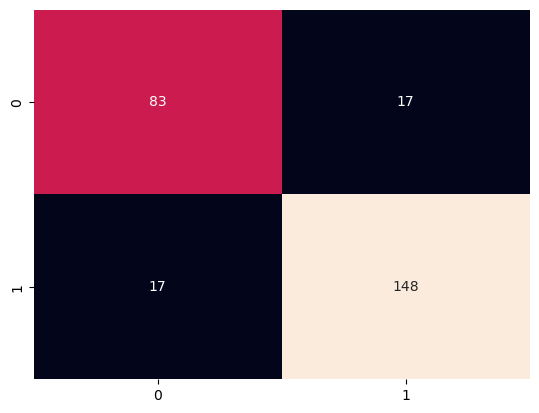

In [108]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cbar=False)

## gradBoost

In [110]:
# gradBoost.get_params()

              precision    recall  f1-score   support

         0.0       0.71      0.37      0.49       100
         1.0       0.70      0.91      0.79       165

    accuracy                           0.71       265
   macro avg       0.71      0.64      0.64       265
weighted avg       0.71      0.71      0.68       265

---- Custom score function
Custom recall on Test data
Special recall: 0.8903874895930507


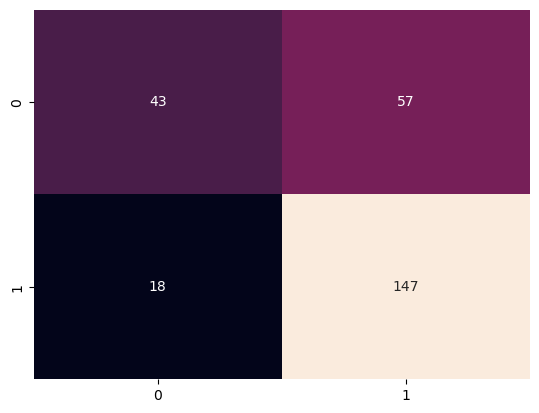

-----


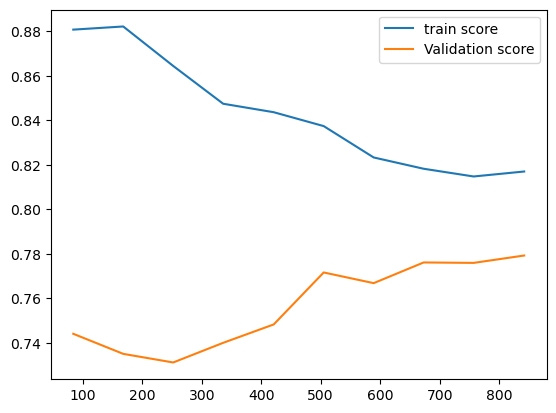

Best estimator


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            min_samples_leaf=10,
                                            min_samples_split=30,
                                            random_state=0))])

F1 score on Test data:  0.8328912466843501


In [111]:
params_to_optimize = {"gradientboostingclassifier__learning_rate":[0.01, 0.05, 0.1],
                      "gradientboostingclassifier__n_estimators": [100,200],
                      'gradientboostingclassifier__min_samples_leaf': [10, 20, 30],
                      'gradientboostingclassifier__min_samples_split': [20, 30, 40]}

best_gradBoost_estimator, f1 = optimize_and_evaluate(
    model_to_optimize=gradBoost,
    param_grid=params_to_optimize,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    evaluation_fn=evaluation,
)

print("Best estimator")
display(best_gradBoost_estimator)
print("F1 score on Test data: ", f1)

### Precision-Recall curve

In [113]:
precision_gradBoost, recal_gradBoost, thresholds_gradBoost = precision_recall_curve(y_test, best_gradBoost_estimator.decision_function(X_test))

Text(0.5, 1.0, 'Precision-Recall function')

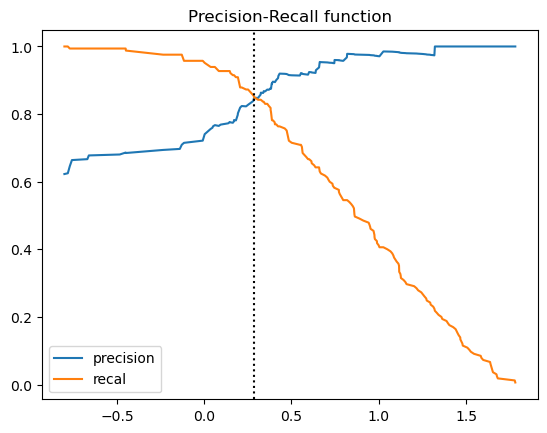

In [114]:
import matplotlib.pyplot as plt
plt.plot(thresholds_gradBoost, precision_gradBoost[:-1], label='precision')
plt.plot(thresholds_gradBoost, recal_gradBoost[:-1], label='recal')
plt.legend()


threshold = thresholds_gradBoost[precision_gradBoost[:-1] < recal_gradBoost[:-1]][-1]
plt.axvline(threshold, c='k', linestyle=':')
plt.title("Precision-Recall function")

In [115]:
def final_model(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [116]:
y_pred = final_model(best_gradBoost_estimator, X_test, threshold=threshold)

In [117]:
accuracy_score(y_test, y_pred)

0.8113207547169812

In [118]:
f1_score(y_test, y_pred)

0.8484848484848485

In [119]:
recall_score(y_test, y_pred)

0.8484848484848485

<Axes: >

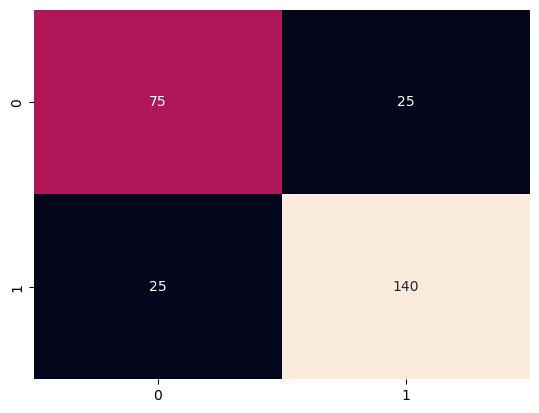

In [120]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cbar=False)

## KNN

In [122]:
# knn.get_params()

              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59       100
         1.0       0.75      0.81      0.78       165

    accuracy                           0.71       265
   macro avg       0.69      0.68      0.68       265
weighted avg       0.70      0.71      0.70       265

---- Custom score function
Custom recall on Test data
Special recall: 0.8407270319882039


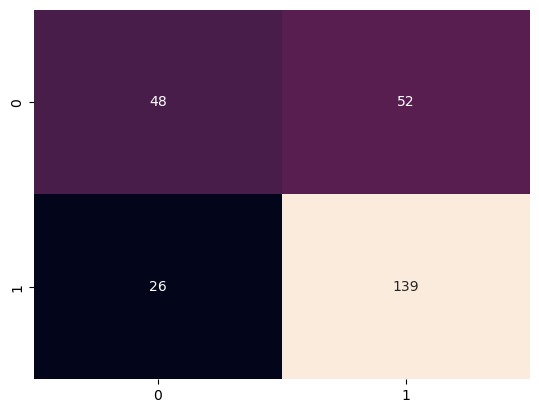

-----


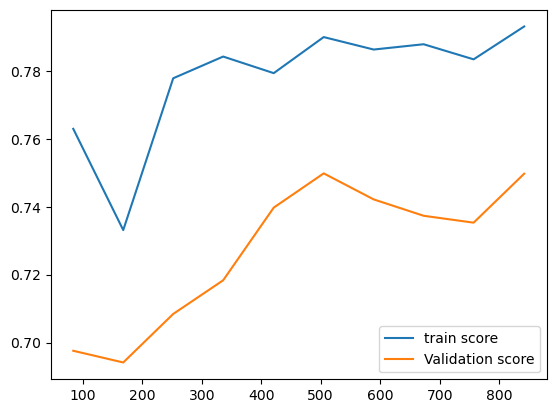

Best estimator


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=9))])

F1 score on Test data:  0.8104956268221575


In [123]:
params_to_optimize = {
    "kneighborsclassifier__metric": ["minkowski", "euclidean", "manhattan"],
    "kneighborsclassifier__n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10],
}

best_knn_estimator, f1 = optimize_and_evaluate(
    model_to_optimize=knn,
    param_grid=params_to_optimize,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    evaluation_fn=evaluation,
)

print("Best estimator")
display(best_knn_estimator)
print("F1 score on Test data: ", f1)

In [124]:
y_pred = best_knn_estimator.predict(X_test)

<Axes: >

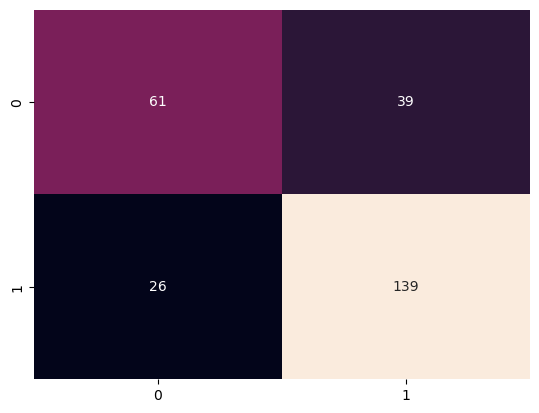

In [125]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, fmt='d')

In [126]:
accuracy_score(y_test, y_pred)

0.7547169811320755

In [127]:
f1_score(y_test, y_pred)

0.8104956268221575

In [128]:
recall_score(y_test, y_pred)

0.8424242424242424

# Benchmarking Best models

In [130]:
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

summary_performances = pd.DataFrame(columns=["Model name", "Recall - Train", "F1 - Train", "Accuracy - Train",
                                             "Recall - Test", "F1 - Test", "Accuracy - Test", "Decision boundary", "Threshold"])

def get_summary_performances(best_model_name, best_model, cv=5, decision_function=False, threshold_index=-1, return_pred=False):


    f1_train = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='f1').mean()
    acc_train = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy').mean()
    recall_train = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='recall').mean()


    th = None
    mp_data_test = None
    if not decision_function:
            y_pred = best_model.predict(X_test)
            f1_score_test = f1_score(y_test, y_pred)
            acc_score_test = accuracy_score(y_test, y_pred)
            recall_score_test = recall_score(y_test, y_pred)
            th = np.nan
    else:
        try:
            precision, recall, thresholds = precision_recall_curve(y_test, best_model.decision_function(X_test))
            th = thresholds[precision[:-1] < recall[:-1]][threshold_index]
            y_pred = final_model(best_model, X_test, threshold=th)
            f1_score_test = f1_score(y_test, y_pred)
            acc_score_test = accuracy_score(y_test, y_pred)
            recall_score_test = recall_score(y_test, y_pred)
            mp_data_test = np.nan


        except BaseException:
            f1_score_test = np.nan
            acc_score_test = np.nan
            recall_score_test = np.nan

    summary_performances.loc[len(summary_performances)] = [best_model_name, recall_train, f1_train, acc_train, recall_score_test,
                                                           f1_score_test, acc_score_test, decision_function, th]


    if return_pred:
        return summary_performances, y_pred

    else:
        return summary_performances

In [131]:
list_of_best_models = [best_decisionTree_estimator, best_randomForest_estimator, best_gradBoost_estimator,
                       best_adaBoost_estimator, best_svm_estimator, best_knn_estimator]

list_of_best_names = ["best_decisionTree_estimator", "best_randomForest_estimator", "best_gradBoost_estimator",
                       "best_adaBoost_estimator", "best_svm_estimator", "best_knn_estimator"]

dict_of_best_models = dict(zip(list_of_best_names[:], list_of_best_models[:]))

In [132]:
for d in [False, True]:
    for name, model in dict_of_best_models.items():
        summary_performances = get_summary_performances(name, model, cv=5, decision_function=d, threshold_index=-1)

In [133]:
summary_performances

,Model name,Recall - Train,F1 - Train,Accuracy - Train,Recall - Test,F1 - Test,Accuracy - Test,Decision boundary,Threshold
0,best_decisionTree_estimator,0.831861,0.769150,0.690440,0.975758,0.813131,0.720755,False,NaN
1,best_randomForest_estimator,0.821092,0.773714,0.701837,0.793939,0.801223,0.754717,False,NaN
2,best_gradBoost_estimator,0.865449,0.779797,0.696145,0.951515,0.832891,0.762264,False,NaN
3,best_adaBoost_estimator,0.811920,0.773438,0.704663,0.896970,0.894260,0.867925,False,NaN
4,best_svm_estimator,0.819636,0.770674,0.697107,0.842424,0.829851,0.784906,False,NaN
5,best_knn_estimator,0.784498,0.749736,0.675225,0.842424,0.810496,0.754717,False,NaN
6,best_decisionTree_estimator,0.831861,0.769150,0.690440,NaN,NaN,NaN,True,NaN
7,best_randomForest_estimator,0.821092,0.773714,0.701837,NaN,NaN,NaN,True,NaN
8,best_gradBoost_estimator,0.865449,0.779797,0.696145,0.848485,0.848485,0.811321,True,0.285800
9,best_adaBoost_estimator,0.811920,0.773438,0.704663,0.896970,0.896970,0.871698,True,0.003149


# Modele choisi:
#### On a choisi le modele qui retourne la meilleur Recall avec un score F1 > 0.85 et une accuracy > 0.8: Un AdaBoost (Threshold de la fonc de decision = -0.033131)

In [136]:
import pickle

In [138]:
filename = './adaBoost_best_model.sav'
pickle.dump(best_adaBoost_estimator, open(filename, 'wb'))
threshold = -0.033131

loaded_model = pickle.load(open(filename, 'rb'))
prediction = final_model(loaded_model, X_test, threshold)

print("Accuracy:", accuracy_score(y_test, prediction))
print("Recall:", recall_score(y_test, prediction))
print("F1:", f1_score(y_test, prediction))

Accuracy: 0.8150943396226416
Recall: 0.9636363636363636
F1: 0.8664850136239782


In [142]:
index = 3
artificial_data = X_test.reset_index(drop=True).iloc[index:index+1]
display(artificial_data)
real_value = y_test.reset_index(drop=True)[index]
print("Real:", real_value)
print("Prediction:", final_model(loaded_model, artificial_data, threshold)[0]*1)

,GP,MIN,PTS,FGM,FGA,FG%,3P%,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
3,24,17.5,5.2,1.8,4.6,39.1,38.5,1.7,72.5,0.1,1.0,1.1,2.9,1.0,0.1,1.0


Real: 0.0
Prediction: 0


In [144]:
index = 4
artificial_data = X_test.reset_index(drop=True).iloc[index:index+1]
display(artificial_data)
real_value = y_test.reset_index(drop=True)[index]
print("Real:", real_value)
print("Prediction:", final_model(loaded_model, artificial_data, threshold)[0]*1)

,GP,MIN,PTS,FGM,FGA,FG%,3P%,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
4,55,9.7,1.7,0.6,1.3,47.9,0.0,0.7,68.3,0.7,1.2,1.9,0.2,0.2,1.1,0.3


Real: 1.0
Prediction: 1


In [146]:
index = 5
artificial_data = X_test.reset_index(drop=True).iloc[index:index+1]
real_value = y_test.reset_index(drop=True)[index]
display(artificial_data)
print("Real:", real_value)
print("Prediction:", final_model(loaded_model, artificial_data, threshold)[0]*1)

,GP,MIN,PTS,FGM,FGA,FG%,3P%,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
5,37,10.9,3.9,1.3,4.4,29.8,23.3,1.7,69.4,0.2,0.7,0.9,1.8,0.5,0.1,1.4


Real: 0.0
Prediction: 0


In [148]:
index = 6
artificial_data = X_test.reset_index(drop=True).iloc[index:index+1]
real_value = y_test.reset_index(drop=True)[index]
display(artificial_data)
print("Real:", real_value)
print("Prediction:", final_model(loaded_model, artificial_data, threshold)[0]*1)

,GP,MIN,PTS,FGM,FGA,FG%,3P%,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
6,82,35.6,18.9,7.5,15.3,49.1,0.0,5.4,71.6,3.3,5.9,9.3,1.4,0.6,1.5,3.0


Real: 1.0
Prediction: 1


---